# Loan Default Prediction

Based on the data that is available during loan application, building a model to predict default in the future. This will help the company in deciding whether or not to grandthe loan.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.version
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
dataset = pd.read_csv('XYZCorp_LendingData.txt',delimiter='\t')

In [3]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
dataset.shape

(855969, 73)

*The text files contain complete loan data for all loans issued by XYZ Corp. through 2007-2015. The data contains the indicator of default, payment information, credit history, etc.

### Data PreProcessing

*Let's explore the data types.

In [5]:
dataset.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths           

In [6]:
#Missing Values
dataset.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [7]:
# Checking the percentage of missing values
round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

id                              0.00
member_id                       0.00
loan_amnt                       0.00
funded_amnt                     0.00
funded_amnt_inv                 0.00
term                            0.00
int_rate                        0.00
installment                     0.00
grade                           0.00
sub_grade                       0.00
emp_title                       5.78
emp_length                      5.03
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
issue_d                         0.00
pymnt_plan                      0.00
desc                           85.77
purpose                         0.00
title                           0.00
zip_code                        0.00
addr_state                      0.00
dti                             0.00
delinq_2yrs                     0.00
earliest_cr_line                0.00
inq_last_6mths                  0.00
mths_since_last_delinq         51.38
m

*Droping the column with huge number of missing values 

In [8]:
dataset=dataset.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog',
                      'annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m',
                      'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
                      'all_util','inq_fi','total_cu_tl','inq_last_12m'],1)

## Exploratory Data Analysis & Feature Engineering

In [9]:
dataset.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec     

### loan_amnt :
*The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


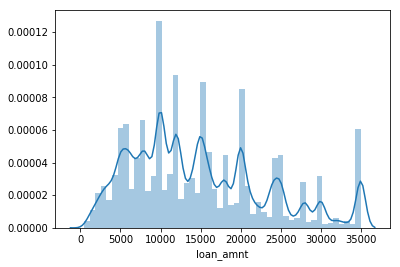

In [10]:
sns.distplot(dataset["loan_amnt"])

### funded_amnt:
The total amount committed to that loan at that point in time.

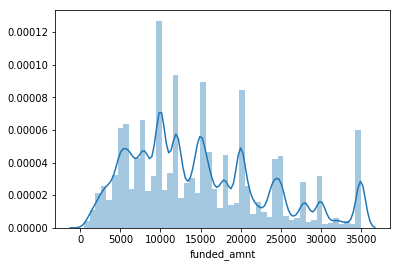

In [11]:
sns.distplot(dataset["funded_amnt"])

### funded_amnt_inv	
The total amount committed by investors for that loan at that point in time.

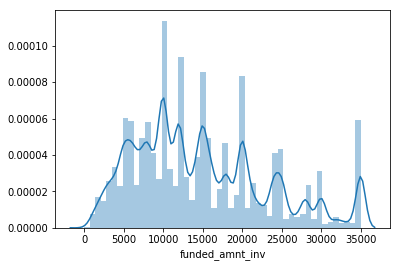

In [12]:
sns.distplot(dataset["funded_amnt_inv"])

### term	
The number of payments on the loan. Values are in months and can be either 36 or 60.


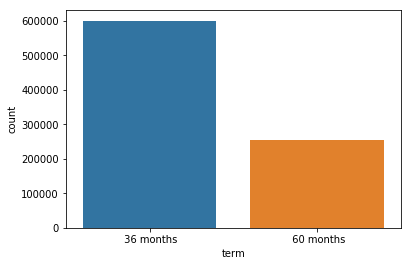

In [13]:
sns.countplot(dataset["term"])

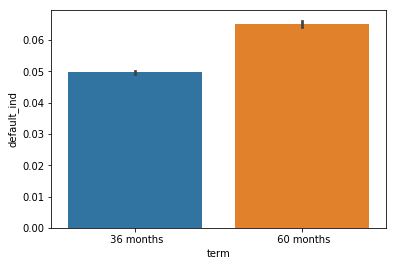

In [14]:
sns.barplot(x="term", y="default_ind", data=dataset)

### int_rate
Interest Rate on the loan

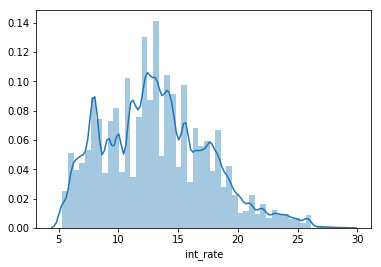

In [15]:
sns.distplot(dataset["int_rate"])

### installment
The monthly payment owed by the borrower if the loan originates.


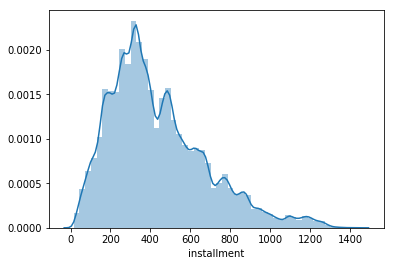

In [16]:
sns.distplot(dataset["installment"])

### grade
XYZ corp. assigned loan grade

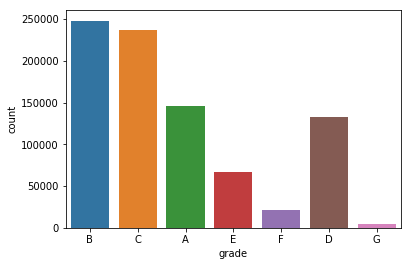

In [17]:
sns.countplot(dataset["grade"])

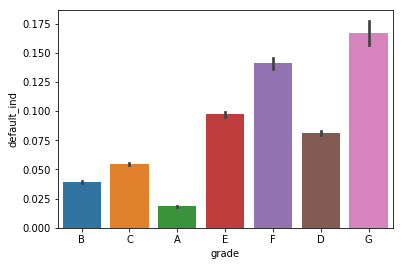

In [18]:
sns.barplot(x="grade", y="default_ind", data=dataset)

### sub_grade
XYZ assigned assigned loan subgrade

In [19]:
dataset.sub_grade.value_counts()

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64

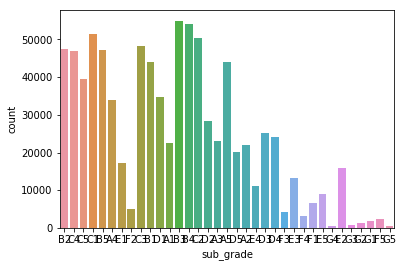

In [20]:
sns.countplot(dataset["sub_grade"])

*we have already seen the grade column in subgrade the number and grade column are combined ,so let's see ony the numbers in this column

In [21]:
def sub_grade_no(data):
    data['sub_grade'] = data['sub_grade'].map(lambda x: int(x.lstrip('ABCDEFG')))
    return data

In [22]:
sub_grade_no(dataset)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,2,...,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,5,...,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,1,...,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,5,...,67.79,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,4,...,161.03,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,5,...,170.08,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,1,...,111.34,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,2,...,152.39,Aug-2012,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,5,...,121.45,Mar-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1


In [23]:
dataset.sub_grade.value_counts()

1    178403
4    174050
2    170769
3    169949
5    162798
Name: sub_grade, dtype: int64

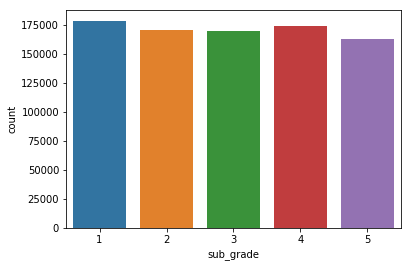

In [24]:
sns.countplot(dataset["sub_grade"])

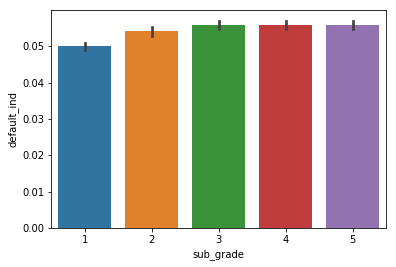

In [25]:
sns.barplot(x="sub_grade", y="default_ind", data=dataset)

### emp_title	
The job title supplied by the Borrower when applying for the loan.

In [26]:
dataset.emp_title.isnull().sum()/dataset.shape[0] * 100

5.776260588876466

In [27]:
dataset.emp_title.value_counts().head()

Teacher             12965
Manager             10821
Registered Nurse     5341
RN                   5182
Owner                5157
Name: emp_title, dtype: int64

In [28]:
dataset.emp_title.value_counts()[0]/dataset.shape[0] * 100

1.5146576569945873

*In emp_title the mode(most frequently position is Teacher) but it is only 1.5% of whole data , it means Teacher cannot 
represent whole column of emp_title.
And most importantly it would not not add any significant information in predicting the result,so i will drop this feature.

In [29]:
def drop_emp_title(data):
    data.drop('emp_title', axis=1, inplace=True)
    return None

In [30]:
drop_emp_title(dataset)

### emp_length:
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means
            ten or more years.

In [31]:
dataset.emp_length.isnull().sum()/dataset.shape[0] * 100

5.030672839787422

In [32]:
dataset.emp_length.value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

Here 10+ years representing [(282090/812908)*100=34.8] 34.8% of data so we can replace the missing values with the mode.

In [33]:
dataset['emp_length'].fillna(dataset['emp_length'].mode()[0], inplace=True)

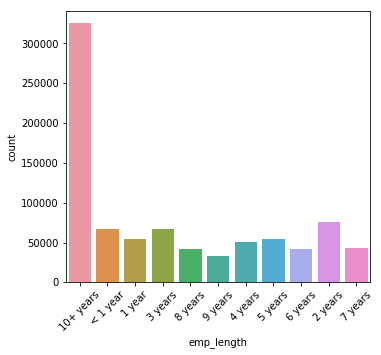

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["emp_length"])
plt.xticks(rotation=45)
plt.show()

### home_ownership	
The home ownership status provided by the borrower during registration. 
                Our values are: RENT, OWN, MORTGAGE, OTHER.

In [35]:
dataset.home_ownership.value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

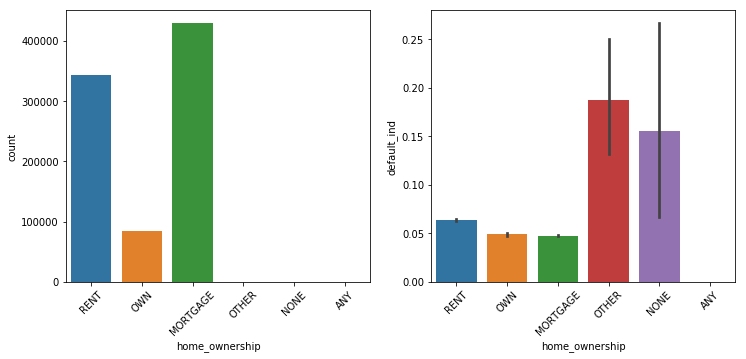

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["home_ownership"])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x="home_ownership", y="default_ind", data=dataset)
plt.xticks(rotation=45)
plt.show()

### annual_inc	
The self-reported annual income provided by the borrower during registration.

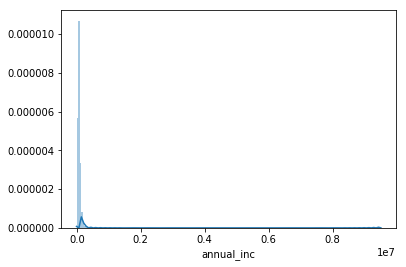

In [37]:
sns.distplot(dataset["annual_inc"], bins=200)

Here we can see that annual_inc is heavily skewed with outlier.Let's try to reduce skewness somewhat 

### verification_status	
Was the income source verified

In [38]:
dataset.verification_status.value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

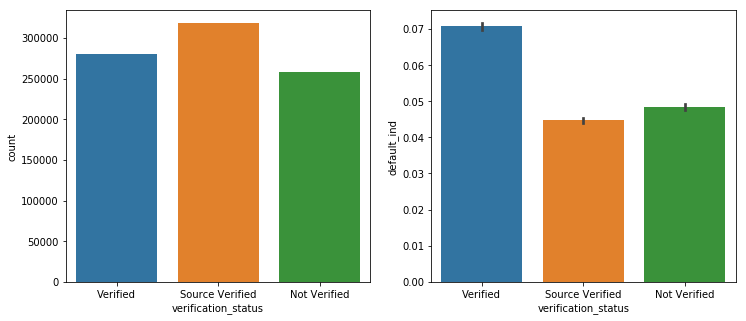

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["verification_status"])
plt.subplot(1,2,2)
sns.barplot(x="verification_status", y="default_ind", data=dataset)
plt.show()

### issue_d	
The month which the loan was funded

In [40]:
dataset.issue_d.value_counts()

Oct-2015    48212
Jul-2015    44906
Oct-2014    37442
Nov-2015    37211
Dec-2015    35638
Aug-2015    35267
Apr-2015    34332
Jan-2015    33887
May-2015    30923
Jul-2014    28315
Sep-2015    28170
Jun-2015    27587
Mar-2015    24573
Nov-2014    24143
Feb-2015    22991
May-2014    18493
Apr-2014    18458
Aug-2014    18203
Jun-2014    16556
Mar-2014    16012
Jan-2014    15178
Feb-2014    14903
Dec-2013    14609
Nov-2013    14299
Oct-2013    13756
Sep-2013    12694
Aug-2013    12414
Jul-2013    11632
Jun-2013    10663
Sep-2014    10233
            ...  
Jan-2010      589
Oct-2009      545
Sep-2009      449
Aug-2009      408
Jul-2009      374
Jun-2009      356
May-2009      319
Apr-2009      290
Mar-2009      276
Feb-2009      260
Jan-2009      239
Mar-2008      236
Dec-2008      223
Nov-2008      184
Feb-2008      174
Jan-2008      171
Apr-2008      155
Oct-2008       96
Dec-2007       85
Jul-2008       83
Aug-2008       71
May-2008       71
Jun-2008       66
Oct-2007       47
Nov-2007  

As we can see above, it is a time-series data(dates). If we include issue_d in our model building, it will increase our
number of features by 103.  There is no significant impact going to be on our model, it would be better to 
remove it.

we will remove this variable after our train test split as per the requirement we need to split our data on the issue_d basis.

In [41]:
#def drop_issue_d(data):
 #   data.drop('issue_d', axis=1, inplace=True)
  #  return None
#drop_issue_d(dataset)

### pymnt_plan	
Indicates if a payment plan has been put in place for the loan


In [42]:
dataset.pymnt_plan.value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

We will exclude this variable because mostly their is no plan is assign to the observatoins ,not provideing any informatoin.

In [43]:
def drop_pymnt_plan(data):
    data.drop('pymnt_plan', axis=1, inplace=True)
    return None
drop_pymnt_plan(dataset)

### purpose
A category provided by the borrower for the loan request. 

In [44]:
dataset.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

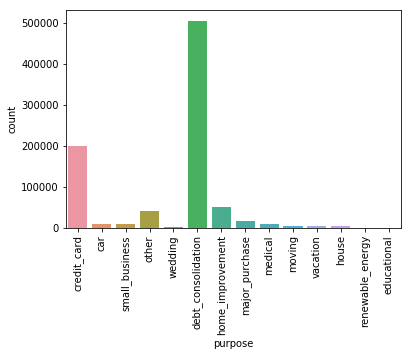

In [45]:
sns.countplot(dataset["purpose"])
plt.xticks(rotation=90)

### title
The loan title provided by the borrower

In [46]:
dataset.title.value_counts()

Debt consolidation                        398089
Credit card refinancing                   159228
Home improvement                           38633
Other                                      30522
Debt Consolidation                         15469
Major purchase                             11519
Medical expenses                            6408
Business                                    6325
Car financing                               5372
Consolidation                               5266
debt consolidation                          4718
Debt Consolidation Loan                     3744
Moving and relocation                       3724
Vacation                                    3640
Credit Card Consolidation                   2326
Home buying                                 2229
consolidation                               2120
Personal Loan                               2057
Consolidation Loan                          1743
Home Improvement                            1736
Credit Card Refinanc

In [47]:
dataset.title.isnull().sum()

33

In [48]:
#Replacing the missing values with mode 
dataset['title'].fillna(dataset['title'].mode()[0], inplace=True)

In [49]:
#Every thing is fine but as we can see the length of this variable is 60991 ,it will increase the dimension in very huge number
#and by dropnig this variable will not effect our model
def drop_title(data):
    data.drop('title', axis=1, inplace=True)
    return None
drop_title(dataset)

In [50]:
dataset.zip_code.value_counts()

945xx    9466
750xx    9111
112xx    8894
606xx    8370
300xx    7820
100xx    7348
070xx    7143
331xx    7139
900xx    7022
770xx    6657
891xx    6193
917xx    6140
330xx    6021
117xx    5885
104xx    5732
921xx    5463
852xx    5257
926xx    5227
913xx    4989
925xx    4752
113xx    4633
334xx    4573
481xx    4491
601xx    4446
021xx    4389
600xx    4387
604xx    4381
080xx    4377
956xx    4191
980xx    4145
         ... 
709xx       1
507xx       1
889xx       1
888xx       1
516xx       1
649xx       1
892xx       1
694xx       1
621xx       1
569xx       1
343xx       1
849xx       1
909xx       1
901xx       1
399xx       1
429xx       1
503xx       1
524xx       1
205xx       1
643xx       1
348xx       1
568xx       1
819xx       1
862xx       1
375xx       1
742xx       1
938xx       1
520xx       1
269xx       1
817xx       1
Name: zip_code, Length: 931, dtype: int64

We will remove this variable as it is not representing the target variable significantly, and by keeping this variable it will
increase the number of features by 931 which is goinng to misslead our model heavily.

In [51]:
def drop_zip_code(data):
    data.drop('zip_code', axis=1, inplace=True)
    return None
drop_zip_code(dataset)

In [52]:
dataset.addr_state.value_counts()

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64

We will remove this variable as it is not representing the target variable significantly, and by keeping this variable it will
increase the number of features by more than 50 which is goinng to misslead our model heavily.

In [53]:
def drop_addr_state(data):
    data.drop('addr_state', axis=1, inplace=True)
    return None
drop_addr_state(dataset)

# dti 	
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage           and the requested loan, divided by the borrower’s self-reported monthly income        

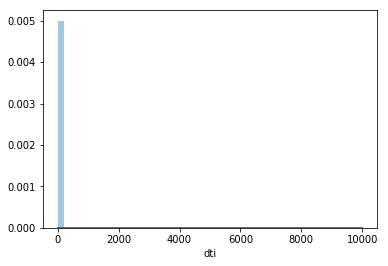

In [54]:
sns.distplot(dataset.dti)
#plt.xlim(0,50)

We can clearly see the data is skewed,we will try to reduce it.

### delinq_2yrs

In [55]:
dataset.delinq_2yrs.value_counts()

0.0     692685
1.0     108733
2.0      32076
3.0      11410
4.0       5077
5.0       2583
6.0       1399
7.0        732
8.0        438
9.0        269
10.0       179
11.0       116
12.0        87
13.0        57
14.0        44
15.0        26
16.0        17
18.0        11
17.0        10
19.0         8
22.0         3
26.0         2
30.0         1
21.0         1
20.0         1
39.0         1
27.0         1
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

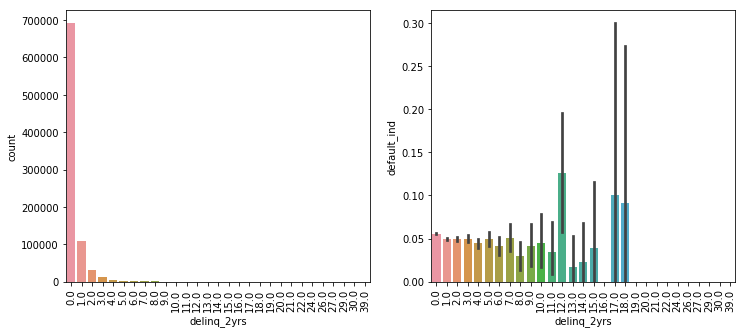

In [56]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["delinq_2yrs"])
plt.xticks(rotation="vertical")
plt.subplot(1,2,2)
sns.barplot(x="delinq_2yrs", y="default_ind", data=dataset)
plt.xticks(rotation="vertical")
plt.show()

### earliest_cr_line
earliest_cr_line: The month the borrower's earliest reported credit line was opened

In [57]:
dataset.earliest_cr_line.value_counts()

Aug-2001    6433
Aug-2000    6322
Oct-2000    6117
Oct-2001    5924
Aug-2002    5858
Sep-2000    5712
Nov-1999    5654
Oct-1999    5630
Nov-2000    5610
Sep-2002    5604
Oct-2002    5493
Sep-2001    5485
Sep-2003    5419
Aug-1999    5418
Sep-1999    5398
Jul-2001    5168
Nov-2001    5044
Aug-2003    5022
Oct-2003    5012
Mar-2001    5007
Sep-1998    4979
Dec-2000    4934
May-2001    4875
Dec-2001    4863
Dec-1999    4855
Sep-2004    4849
Jul-2000    4838
Oct-1998    4767
Jun-2001    4765
Mar-2000    4735
            ... 
Nov-1957       1
Apr-1958       1
Sep-1953       1
Feb-1960       1
Jan-1948       1
Oct-1954       1
Jul-1955       1
Jan-1946       1
Jul-1961       1
May-1957       1
Nov-1950       1
Jun-1955       1
May-1961       1
Apr-1960       1
Aug-1955       1
Jul-1951       1
Sep-1957       1
Aug-1946       1
Aug-1951       1
Mar-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Feb-1957       1
Mar-1959       1
May-1950       1
May-1953       1
Dec-1950      

This data is time series data,by including this it will increse the number of dimension by more than 500 and most important it 
is not providing any siginificant informatin it would be better to drop it.

In [58]:
def drop_earliest_cr_line(data):
    data.drop('earliest_cr_line', axis=1, inplace=True)
    return None
drop_earliest_cr_line(dataset)

### inq_last_6mths
inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [59]:
dataset.inq_last_6mths.value_counts()

0.0    482665
1.0    232983
2.0     90479
3.0     35902
4.0      9589
5.0      3359
6.0       922
7.0        48
8.0        22
Name: inq_last_6mths, dtype: int64

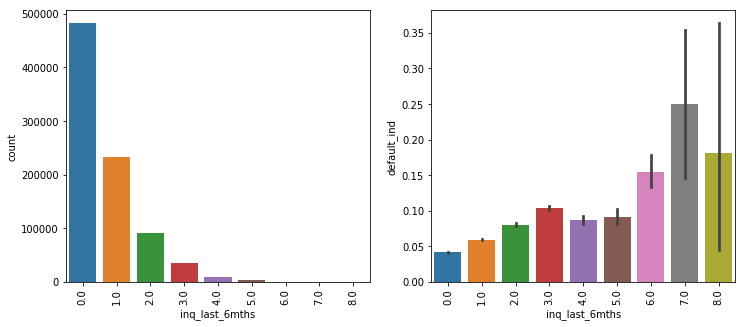

In [60]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["inq_last_6mths"])
plt.xticks(rotation="vertical")
plt.subplot(1,2,2)
sns.barplot(x="inq_last_6mths", y="default_ind", data=dataset)
plt.xticks(rotation="vertical")
plt.show()

### open_acc
open_acc: The number of open credit lines in the borrower's credit file.

In [61]:
dataset.open_acc.value_counts().head()

9.0     77533
10.0    75611
8.0     73967
11.0    69742
7.0     65607
Name: open_acc, dtype: int64

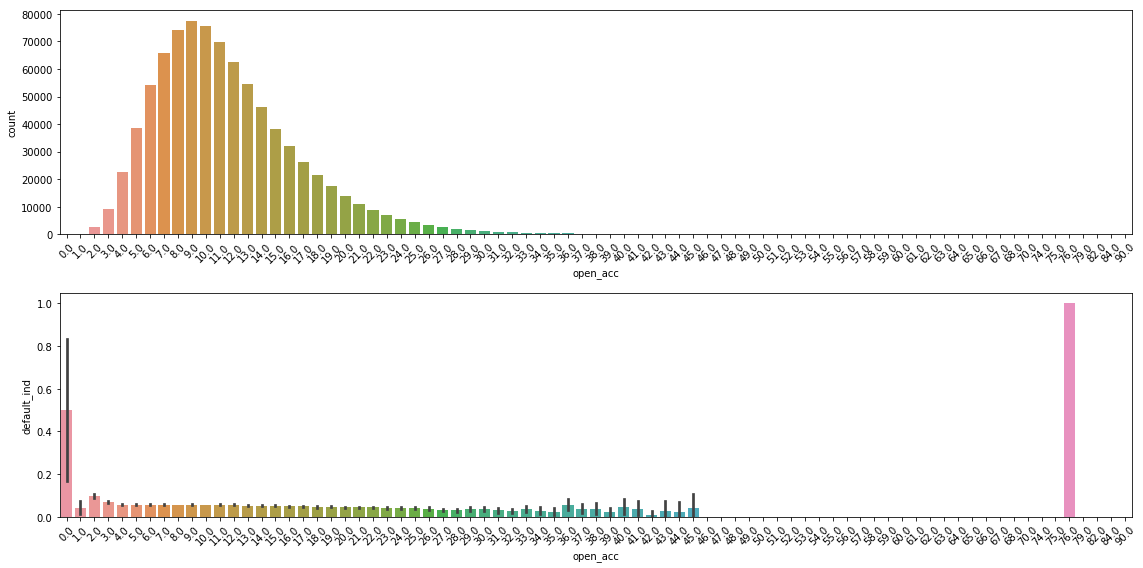

In [62]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(dataset["open_acc"])
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x="open_acc", y="default_ind", data=dataset)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### pub_rec
pub_rec: Number of derogatory public records

In [63]:
dataset.pub_rec.value_counts().head()

0.0    725455
1.0    108920
2.0     14250
3.0      4305
4.0      1496
Name: pub_rec, dtype: int64

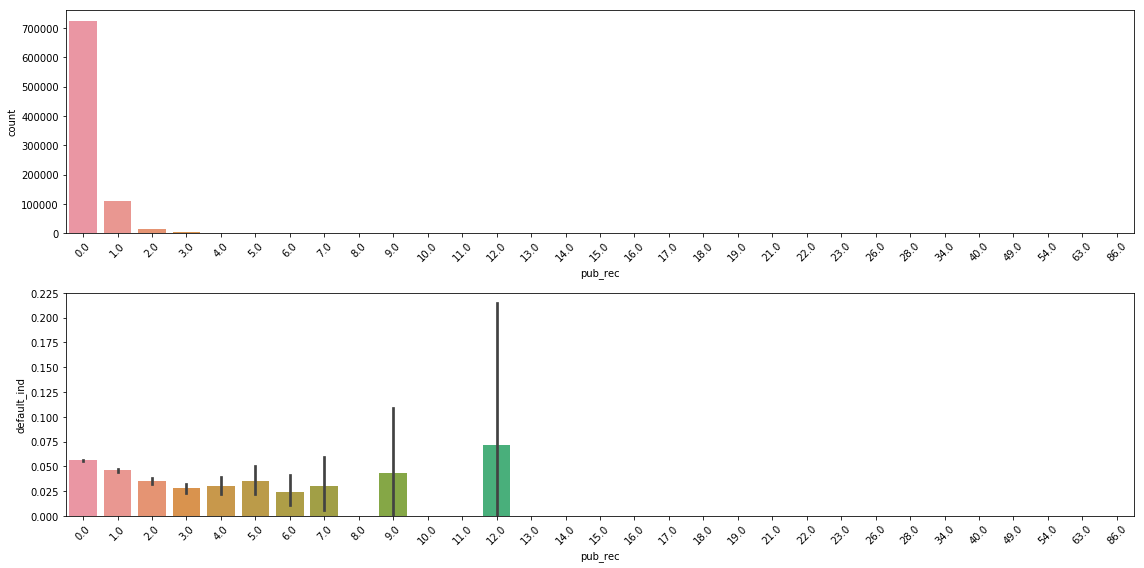

In [64]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(dataset["pub_rec"])
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x="pub_rec", y="default_ind", data=dataset)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### revol_bal
revol_bal: Total credit revolving balance

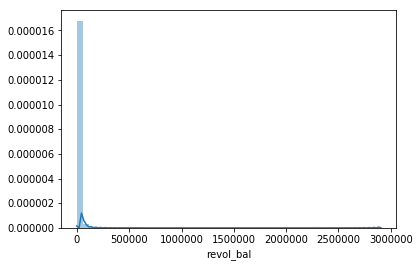

In [65]:
sns.distplot(dataset.revol_bal)

### revol_util
revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available 
revolving credit.

In [66]:
dataset.revol_util.isnull().sum()

446

In [67]:
dataset.revol_util.value_counts().head()

0.0     3361
58.0    1723
53.0    1702
59.0    1694
61.0    1684
Name: revol_util, dtype: int64

In [68]:
dataset['revol_util'].fillna(dataset['revol_util'].median(), inplace=True)

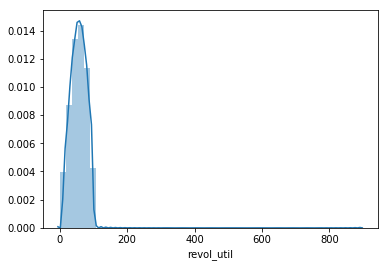

In [69]:
sns.distplot(dataset.revol_util)

### total_acc:
The total number of credit lines currently in the borrower's credit file

In [70]:
dataset.total_acc.value_counts().head()

22.0    31159
20.0    30955
21.0    30917
19.0    30545
23.0    30213
Name: total_acc, dtype: int64

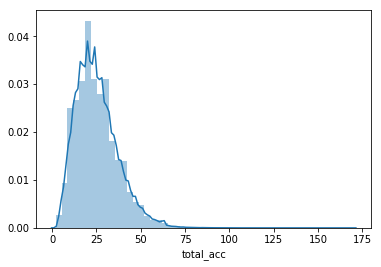

In [71]:
sns.distplot(dataset.total_acc)

### initial_list_status:
The initial listing status of the loan. Possible values are – W, F

In [72]:
dataset.initial_list_status.value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

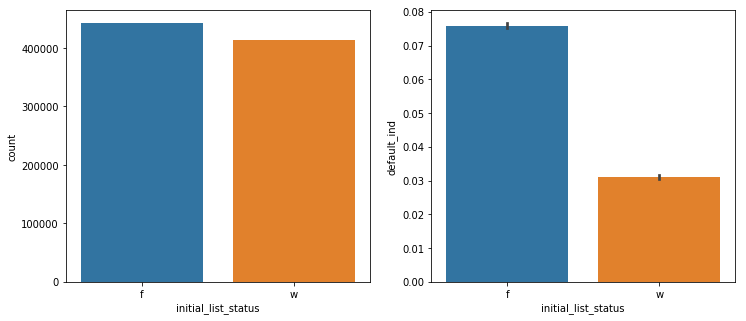

In [73]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["initial_list_status"])
plt.subplot(1,2,2)
sns.barplot(x="initial_list_status", y="default_ind", data=dataset)
plt.show()

## out_prncp:
Remaining outstanding principal for total amount funded

In [74]:
dataset.out_prncp.value_counts().head(5)

0.0        253030
10000.0       578
15000.0       481
12000.0       480
20000.0       472
Name: out_prncp, dtype: int64

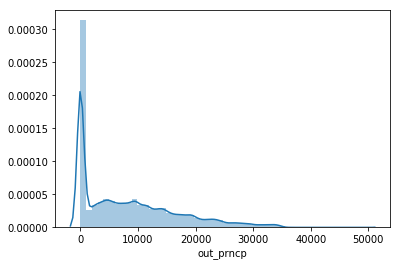

In [75]:
sns.distplot(dataset.out_prncp)

In [76]:
dataset.out_prncp.value_counts().head(5)/dataset.shape[0] * 100

0.0        29.560650
10000.0     0.067526
15000.0     0.056194
12000.0     0.056077
20000.0     0.055142
Name: out_prncp, dtype: float64

In [77]:
#def drop_out_prncp(data):
 #   data.drop('out_prncp', axis=1, inplace=True)
  #  return None
#drop_out_prncp(dataset)

### out_prncp_inv: 
Remaining outstanding principal for portion of total amount funded by investors

In [78]:
dataset.out_prncp_inv.value_counts().head(5)

0.0        253030
10000.0       567
12000.0       463
15000.0       460
20000.0       436
Name: out_prncp_inv, dtype: int64

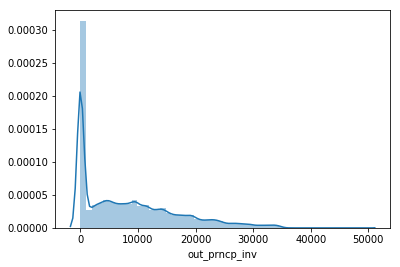

In [79]:
sns.distplot(dataset.out_prncp_inv)

In [80]:
dataset.out_prncp_inv.value_counts().head(5)/dataset.shape[0] * 100

0.0        29.560650
10000.0     0.066241
12000.0     0.054091
15000.0     0.053740
20000.0     0.050936
Name: out_prncp_inv, dtype: float64

In [81]:
#def drop_out_prncp_inv(data):
  #  data.drop('out_prncp_inv', axis=1, inplace=True)
 #   return None
#drop_out_prncp_inv(dataset)

### total_pymnt:
Payments received to date for total amount funded

In [82]:
dataset.total_pymnt.value_counts().head()

0.00       8960
938.06      134
648.57      133
623.86      131
1566.46     117
Name: total_pymnt, dtype: int64

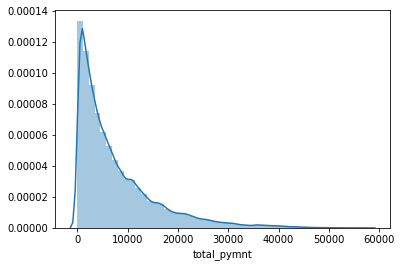

In [83]:
sns.distplot(dataset["total_pymnt"], label="total_pymnt")

### total_pymnt_inv
Payments received to date for portion of total amount funded by investors

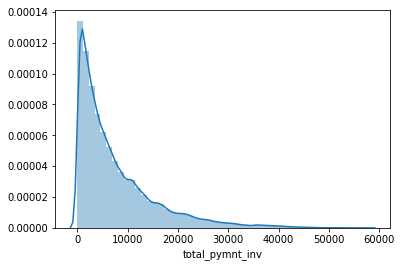

In [84]:
sns.distplot(dataset["total_pymnt_inv"], label="total_pymnt_inv")

### total_rec_prncp:
Principal received to date

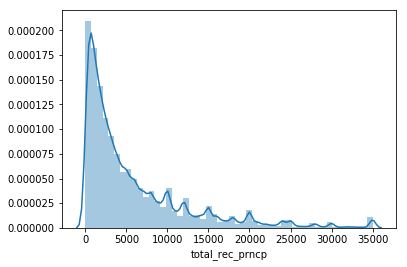

In [85]:
sns.distplot(dataset.total_rec_prncp)

### total_rec_int
Interest received to date

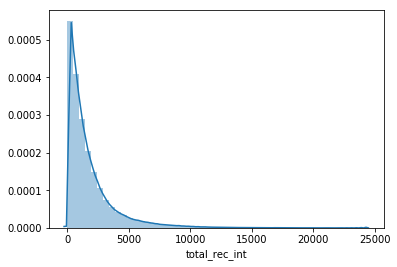

In [86]:
sns.distplot(dataset.total_rec_int)

### total_rec_late_fee: 
Late fees received to date

In [87]:
dataset.total_rec_late_fee.value_counts().head()

0.00     845995
15.00      2248
30.00       249
45.00        28
16.37        15
Name: total_rec_late_fee, dtype: int64

In [88]:
dataset.total_rec_late_fee.value_counts().head(5)/dataset.shape[0] * 100

0.00     98.834771
15.00     0.262626
30.00     0.029090
45.00     0.003271
16.37     0.001752
Name: total_rec_late_fee, dtype: float64

In [89]:
#98% of the valus are zero better to drop it.

def drop_total_rec_late_fee(data):
    data.drop('total_rec_late_fee', axis=1, inplace=True)
    return None
drop_total_rec_late_fee(dataset)

### recoveries	
post charge off gross recovery

In [90]:
dataset.recoveries.value_counts().head(5)

0.00      831782
200.00        10
14.28          9
11.70          9
100.00         8
Name: recoveries, dtype: int64

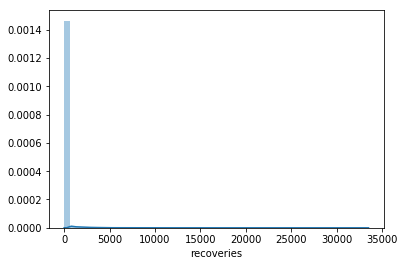

In [91]:
sns.distplot(dataset.recoveries)

In [92]:
def drop_recoveries(data):
    data.drop('recoveries', axis=1, inplace=True)
    return None
drop_recoveries(dataset)

### collection_recovery_fee	
post charge off collection fee

In [93]:
dataset.collection_recovery_fee.value_counts().head()

0.00    832934
2.00        15
4.52        11
1.88        11
2.52        11
Name: collection_recovery_fee, dtype: int64

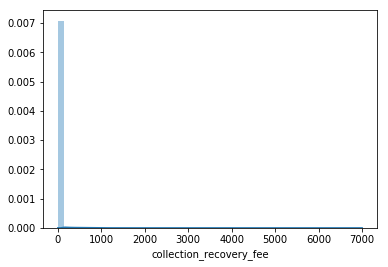

In [94]:
sns.distplot(dataset.collection_recovery_fee)

In [95]:
def drop_collection_recovery_fee(data):
    data.drop('collection_recovery_fee', axis=1, inplace=True)
    return None
drop_collection_recovery_fee(dataset)

### last_pymnt_d
Last month payment was received

In [96]:
dataset.last_pymnt_d.value_counts().head()

Jan-2016    467510
Dec-2015    142783
Jul-2015     14472
Aug-2015     13010
Oct-2015     12503
Name: last_pymnt_d, dtype: int64

It's a time series data,better to drop it.

In [97]:
def drop_last_pymnt_d(data):
    data.drop('last_pymnt_d', axis=1, inplace=True)
    return None
drop_last_pymnt_d(dataset)

### last_pymnt_amnt
Last total payment amount received

In [98]:
dataset.last_pymnt_amnt.value_counts().head()

0.00      8867
327.34    2053
318.79    1767
312.86    1437
392.81    1374
Name: last_pymnt_amnt, dtype: int64

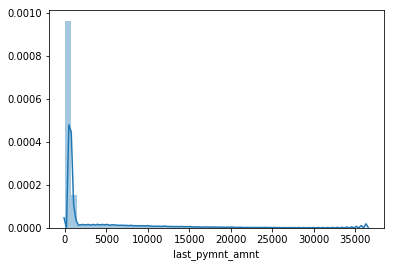

In [99]:
sns.distplot(dataset.last_pymnt_amnt)

### last_credit_pull_d:
The most recent month LC pulled credit for this loan

In [100]:
dataset.last_credit_pull_d.value_counts().head()

Jan-2016    701687
Dec-2015     19039
Nov-2015     11388
Oct-2015     10290
Sep-2015      9985
Name: last_credit_pull_d, dtype: int64

It's a time series data,better to drop it.

In [101]:
def drop_last_credit_pull_d(data):
    data.drop('last_credit_pull_d', axis=1, inplace=True)
    return None
drop_last_credit_pull_d(dataset)

## collections_12_mths_ex_med:
Number of collections in 12 months excluding medical collections

In [102]:
dataset.collections_12_mths_ex_med.value_counts().head()

0.0    844768
1.0     10320
2.0       709
3.0        80
4.0        22
Name: collections_12_mths_ex_med, dtype: int64

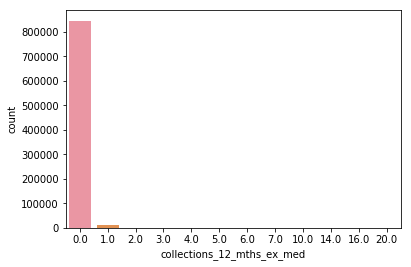

In [103]:
sns.countplot(dataset["collections_12_mths_ex_med"])

In [104]:
dataset.collections_12_mths_ex_med.value_counts().head(5)/dataset.shape[0] * 100

0.0    98.691425
1.0     1.205651
2.0     0.082830
3.0     0.009346
4.0     0.002570
Name: collections_12_mths_ex_med, dtype: float64

In [105]:
#98% of the data has value equal to zero ,better to frop it.
def drop_collections_12_mths_ex_med(data):
    data.drop('collections_12_mths_ex_med', axis=1, inplace=True)
    return None
drop_collections_12_mths_ex_med(dataset)

### policy_code
"publicly available policy_code=1
new products not publicly available policy_code=2"

In [106]:
dataset.policy_code.value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [107]:
#  It has only one category, no use in analysis because all the observation has only single value no need to analys,better to
#    drop it

In [108]:
def drop_policy_code(data):
    data.drop('policy_code', axis=1, inplace=True)
    return None
drop_policy_code(dataset)

### application_type: 
Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [109]:
dataset.application_type.value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

In [110]:
dataset.application_type.value_counts()/dataset.shape[0] * 100

INDIVIDUAL    99.948363
JOINT          0.051637
Name: application_type, dtype: float64

In [111]:
#no use in analysis because all the observation has almost same value no need to analys,better to drop it

In [112]:
def drop_application_type(data):
    data.drop('application_type', axis=1, inplace=True)
    return None
drop_application_type(dataset)

### acc_now_delinq: 
The number of accounts on which the borrower is now delinquent.

In [113]:
dataset.acc_now_delinq.value_counts()

0.0     852039
1.0       3693
2.0        198
3.0         28
4.0          6
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

In [114]:
dataset.acc_now_delinq.value_counts()/dataset.shape[0] * 100

0.0     99.540871
1.0      0.431441
2.0      0.023132
3.0      0.003271
4.0      0.000701
5.0      0.000350
6.0      0.000117
14.0     0.000117
Name: acc_now_delinq, dtype: float64

In [115]:
#98% of the data has value equal to zero ,better to frop it.

def drop_acc_now_delinq(data):
    data.drop('acc_now_delinq', axis=1, inplace=True)
    return None
drop_acc_now_delinq(dataset)

tot_coll_amt: Total collection amounts ever owed
tot_cur_bal: Total current balance of all accounts
total_rev_hi_lim: Total revolving high credit/credit limit

### tot_coll_amt

In [116]:
dataset.tot_coll_amt.isnull().sum()/dataset.shape[0]

0.07863953016990101

In [117]:
dataset.tot_coll_amt.value_counts().head()/dataset.shape[0]*100

0.0      79.098893
50.0      0.197203
100.0     0.152692
75.0      0.116593
200.0     0.080377
Name: tot_coll_amt, dtype: float64

7.8% of values are missing and 79% are having 0.0 as its value. Let's drop this column.

In [118]:
def drop_tot_coll_amt(data):
    data.drop('tot_coll_amt', axis=1, inplace=True)
    return None
drop_tot_coll_amt(dataset)

### tot_cur_bal

In [119]:
dataset.tot_cur_bal.isnull().sum()/dataset.shape[0]*100

7.863953016990101

In [120]:
dataset.tot_cur_bal.value_counts().head(20)

0.0        121
22396.0     21
27316.0     20
29232.0     20
34574.0     20
19820.0     19
19167.0     19
12948.0     19
28674.0     19
12066.0     19
14511.0     19
5537.0      19
19998.0     19
17848.0     19
17154.0     18
23269.0     18
27399.0     18
18311.0     18
26475.0     18
31078.0     18
Name: tot_cur_bal, dtype: int64

In [121]:
dataset.tot_cur_bal.value_counts().head(20)/dataset.shape[0]*100

0.0        0.014136
22396.0    0.002453
27316.0    0.002337
29232.0    0.002337
34574.0    0.002337
19820.0    0.002220
19167.0    0.002220
12948.0    0.002220
28674.0    0.002220
12066.0    0.002220
14511.0    0.002220
5537.0     0.002220
19998.0    0.002220
17848.0    0.002220
17154.0    0.002103
23269.0    0.002103
27399.0    0.002103
18311.0    0.002103
26475.0    0.002103
31078.0    0.002103
Name: tot_cur_bal, dtype: float64

In [122]:
dataset['tot_cur_bal'].fillna(dataset['tot_cur_bal'].median(), inplace=True)

(0, 1000000.0)

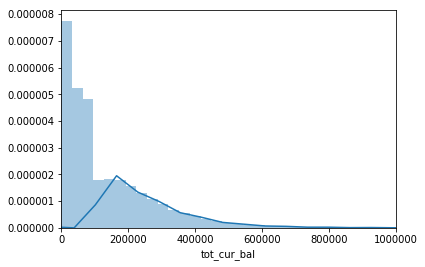

In [123]:
sns.distplot(dataset.tot_cur_bal[dataset.tot_cur_bal.isnull()==False], bins=250)
plt.xlim(0,0.1e7)

In [124]:
dataset.tot_cur_bal.median()

81008.5

In [125]:
dataset.tot_cur_bal.mean()

135145.56586920787

In [126]:
#def drop_tot_cur_bal (data):
#    data.drop('tot_cur_bal', axis=1, inplace=True)
#    return None
#drop_tot_cur_bal(dataset)

### total_rev_hi_lim

In [127]:
dataset.total_rev_hi_lim.isnull().sum()/dataset.shape[0]

0.07863953016990101

In [128]:
dataset.total_rev_hi_lim.value_counts().head()

15000.0    2554
10000.0    2525
12000.0    2519
13000.0    2507
14500.0    2502
Name: total_rev_hi_lim, dtype: int64

In [129]:
dataset.total_rev_hi_lim.median()

23800.0

In [130]:
dataset.total_rev_hi_lim.mean()

32163.5745255219

In [131]:
# the difference is less between the mean and median as compair to the above variables,replacing missing value with median.

dataset['total_rev_hi_lim'].fillna(dataset['total_rev_hi_lim'].median(), inplace=True)

(0, 200000.0)

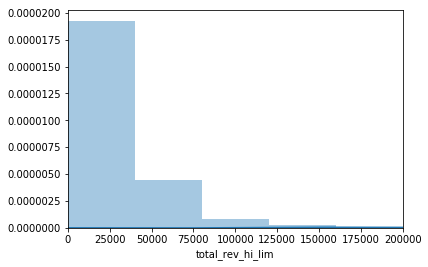

In [132]:
sns.distplot(dataset.total_rev_hi_lim[dataset.total_rev_hi_lim.isnull()==False],bins=250)
plt.xlim(0,2e5)

In [133]:
def drop_id(data):
    data.drop('id', axis=1, inplace=True)
    return None
drop_id(dataset)

In [134]:
def drop_member_id(data):
    data.drop('member_id', axis=1, inplace=True)
    return None
drop_member_id(dataset)

In [135]:
dataset.dtypes

loan_amnt              float64
funded_amnt            float64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade                int64
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
purpose                 object
dti                    float64
delinq_2yrs            float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util             float64
total_acc              float64
initial_list_status     object
out_prncp              float64
out_prncp_inv          float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_amnt        float64
tot_cur_bal            float64
total_rev_hi_lim       float64
default_

# #Creating Dummy variables 

continous =  ['loan_amnt' ,'funded_amnt', 'funded_amnt_inv', 'term','int_rate',
            'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
            'annual_inc', 'verification_status', 'purpose', 'dti',
            'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
            'total_acc','out_prncp','out_prncp_inv', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
            'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
            'total_rev_hi_lim', 'loan_status_coded',tot_cur_bal]

categorical = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
               'purpose','title','initial_list_status']

In [136]:
# Creating a dummy variable for the variable 'term' and dropping the first one.
term_d = pd.get_dummies(dataset['term'],prefix='term',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,term_d],axis=1)

# Creating a dummy variable for the variable 'grade' and dropping the first one.
grade_d = pd.get_dummies(dataset['grade'],prefix='grade',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,grade_d],axis=1)

# Creating a dummy variable for the variable 'emp_length' and dropping the first one.
emp_length_d = pd.get_dummies(dataset['emp_length'],prefix='emp_length',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,emp_length_d],axis=1)

# Creating a dummy variable for the variable 'home_ownership' and dropping the first one.
home_ownership_d = pd.get_dummies(dataset['home_ownership'],prefix='home_ownership',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,home_ownership_d],axis=1)

# Creating a dummy variable for the variable 'verification_status' and dropping the first one.
verification_status_d = pd.get_dummies(dataset['verification_status'],prefix='verification_status',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,verification_status_d],axis=1)

# Creating a dummy variable for the variable 'purpose' and dropping the first one.
purpose_d = pd.get_dummies(dataset['purpose'],prefix='purpose',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,purpose_d],axis=1)

# Creating a dummy variable for the variable 'initial_list_status' and dropping the first one.
initial_list_status_d = pd.get_dummies(dataset['initial_list_status'],prefix='initial_list_status',drop_first=True)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,initial_list_status_d],axis=1)


# #Dropping the repeated variables

In [137]:
# We have created dummies for the below variables, so we can drop them
dataset = dataset.drop(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose',
                        'initial_list_status'], 1)

In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 64 columns):
loan_amnt                              855969 non-null float64
funded_amnt                            855969 non-null float64
funded_amnt_inv                        855969 non-null float64
int_rate                               855969 non-null float64
installment                            855969 non-null float64
sub_grade                              855969 non-null int64
annual_inc                             855969 non-null float64
issue_d                                855969 non-null object
dti                                    855969 non-null float64
delinq_2yrs                            855969 non-null float64
inq_last_6mths                         855969 non-null float64
open_acc                               855969 non-null float64
pub_rec                                855969 non-null float64
revol_bal                              855969 non-null float64
revol_util

In [139]:
# Checking percentage of missing values after removing the missing values
round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

loan_amnt                              0.0
funded_amnt                            0.0
funded_amnt_inv                        0.0
int_rate                               0.0
installment                            0.0
sub_grade                              0.0
annual_inc                             0.0
issue_d                                0.0
dti                                    0.0
delinq_2yrs                            0.0
inq_last_6mths                         0.0
open_acc                               0.0
pub_rec                                0.0
revol_bal                              0.0
revol_util                             0.0
total_acc                              0.0
out_prncp                              0.0
out_prncp_inv                          0.0
total_pymnt                            0.0
total_pymnt_inv                        0.0
total_rec_prncp                        0.0
total_rec_int                          0.0
last_pymnt_amnt                        0.0
tot_cur_bal

# #Normalising continuous features

In [140]:
df   =  dataset[['loan_amnt' ,'funded_amnt','funded_amnt_inv','int_rate','installment', 'annual_inc','dti' ,'delinq_2yrs',
                   'inq_last_6mths', 'open_acc','pub_rec' , 'revol_bal','revol_util' ,'total_acc' ,'out_prncp' ,'out_prncp_inv' ,
                   'total_pymnt' , 'total_pymnt_inv','total_rec_prncp','total_rec_int' ,'last_pymnt_amnt' ,'tot_cur_bal',
                    'total_rev_hi_lim' ]]     

In [141]:
normalized_df=(df-df.mean())/df.std()

In [142]:
dataset=dataset.drop(['loan_amnt' ,'funded_amnt','funded_amnt_inv','int_rate','installment', 'annual_inc','dti' ,'delinq_2yrs',
                       'inq_last_6mths', 'open_acc','pub_rec' , 'revol_bal','revol_util' ,'total_acc' ,'out_prncp' ,'out_prncp_inv' ,
                       'total_pymnt' , 'total_pymnt_inv','total_rec_prncp','total_rec_int' ,'last_pymnt_amnt' ,'tot_cur_bal',
                        'total_rev_hi_lim' ],1)

In [143]:
dataset = pd.concat([dataset,normalized_df],axis=1)

# #Splitting Data into Training and Test Sets

In [144]:
#We need to split the data on the basis of issue date.
dataset['issue_d'] = pd.to_datetime(dataset['issue_d'])
dataset = dataset.set_index(dataset['issue_d'])
dataset = dataset.sort_index()
train = dataset['June 2007':'May 2015']
test  = dataset['June 2015':]

In [145]:
train=train.drop(['issue_d'],1)
test=test.drop(['issue_d'],1)

In [146]:
# Now spliting into x_train,x_test,y_train,y_test

x_train = train.drop(['default_ind'],axis=1)
y_train = train['default_ind']
x_test =  test.drop(['default_ind'],axis=1)
y_test =  test['default_ind']

In [147]:
x_train.head()

,sub_grade,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,...,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
issue_d,,,,,,,,,,,,,,,,,,,,,
2007-06-01,2,0,0,0,0,1,0,0,0,0,...,-1.461164,-0.979069,-0.979069,0.194918,-0.842288,0.247013,-0.028855,-0.404812,-0.3643,-0.212535
2007-07-01,2,0,0,0,0,0,0,0,0,0,...,-0.530447,-0.979069,-0.979069,-0.313441,-0.422015,-0.127440,-0.759419,0.446351,-0.3643,-0.212535
2007-07-01,2,0,0,0,0,0,0,0,1,0,...,-0.784279,-0.979069,-0.979069,-0.155739,-0.446159,-0.015104,-0.520512,-0.456580,-0.3643,-0.212535
2007-07-01,2,0,0,0,0,0,0,0,0,0,...,-1.545775,-0.979069,-0.979069,-0.260438,-0.402716,-0.127440,-0.558034,-0.424943,-0.3643,-0.212535
2007-07-01,5,0,0,1,0,0,0,0,0,0,...,-1.799607,-0.979069,-0.979069,-0.787410,-0.966654,-0.696608,-0.734823,-0.449445,-0.3643,-0.212535


In [148]:
x_test.head()

,sub_grade,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_2 years,...,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
issue_d,,,,,,,,,,,,,,,,,,,,,
2015-06-01,2,0,1,0,0,0,0,0,0,0,...,1.584820,2.439050,2.440444,0.017607,0.021603,0.033734,-0.018517,-0.228206,0.620086,1.075495
2015-06-01,2,1,1,0,0,0,0,0,1,0,...,-1.207332,0.270244,0.268036,-0.786544,-0.785414,-0.737292,-0.601052,-0.408288,-0.527190,0.055000
2015-06-01,1,1,0,0,1,0,0,0,0,1,...,-0.192004,0.341444,0.341983,-0.749447,-0.747809,-0.752643,-0.410870,-0.398080,-0.499802,-0.306310
2015-06-01,1,0,0,1,0,0,0,0,0,0,...,0.823324,2.467032,2.468438,0.064952,0.069093,-0.001732,0.275114,-0.217602,0.955268,0.134985
2015-06-01,1,1,1,0,0,0,0,0,1,0,...,1.161766,1.902867,1.904043,-0.484138,-0.481685,-0.484936,-0.261420,-0.344542,0.501450,0.419069


In [149]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598978 entries, 2007-06-01 to 2015-05-01
Data columns (total 62 columns):
sub_grade                              598978 non-null int64
term_ 60 months                        598978 non-null uint8
grade_B                                598978 non-null uint8
grade_C                                598978 non-null uint8
grade_D                                598978 non-null uint8
grade_E                                598978 non-null uint8
grade_F                                598978 non-null uint8
grade_G                                598978 non-null uint8
emp_length_10+ years                   598978 non-null uint8
emp_length_2 years                     598978 non-null uint8
emp_length_3 years                     598978 non-null uint8
emp_length_4 years                     598978 non-null uint8
emp_length_5 years                     598978 non-null uint8
emp_length_6 years                     598978 non-null uint8
emp_length_7 years 

In [150]:
y_train.head()

issue_d
2007-06-01    0
2007-07-01    0
2007-07-01    0
2007-07-01    0
2007-07-01    0
Name: default_ind, dtype: int64

In [151]:
y_test.head()

issue_d
2015-06-01    0
2015-06-01    0
2015-06-01    0
2015-06-01    0
2015-06-01    0
Name: default_ind, dtype: int64

In [152]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598978 entries, 2007-06-01 to 2015-05-01
Data columns (total 62 columns):
sub_grade                              598978 non-null int64
term_ 60 months                        598978 non-null uint8
grade_B                                598978 non-null uint8
grade_C                                598978 non-null uint8
grade_D                                598978 non-null uint8
grade_E                                598978 non-null uint8
grade_F                                598978 non-null uint8
grade_G                                598978 non-null uint8
emp_length_10+ years                   598978 non-null uint8
emp_length_2 years                     598978 non-null uint8
emp_length_3 years                     598978 non-null uint8
emp_length_4 years                     598978 non-null uint8
emp_length_5 years                     598978 non-null uint8
emp_length_6 years                     598978 non-null uint8
emp_length_7 years 

In [153]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256991 entries, 2015-06-01 to 2015-12-01
Data columns (total 62 columns):
sub_grade                              256991 non-null int64
term_ 60 months                        256991 non-null uint8
grade_B                                256991 non-null uint8
grade_C                                256991 non-null uint8
grade_D                                256991 non-null uint8
grade_E                                256991 non-null uint8
grade_F                                256991 non-null uint8
grade_G                                256991 non-null uint8
emp_length_10+ years                   256991 non-null uint8
emp_length_2 years                     256991 non-null uint8
emp_length_3 years                     256991 non-null uint8
emp_length_4 years                     256991 non-null uint8
emp_length_5 years                     256991 non-null uint8
emp_length_6 years                     256991 non-null uint8
emp_length_7 years 

## Checking the correlation 

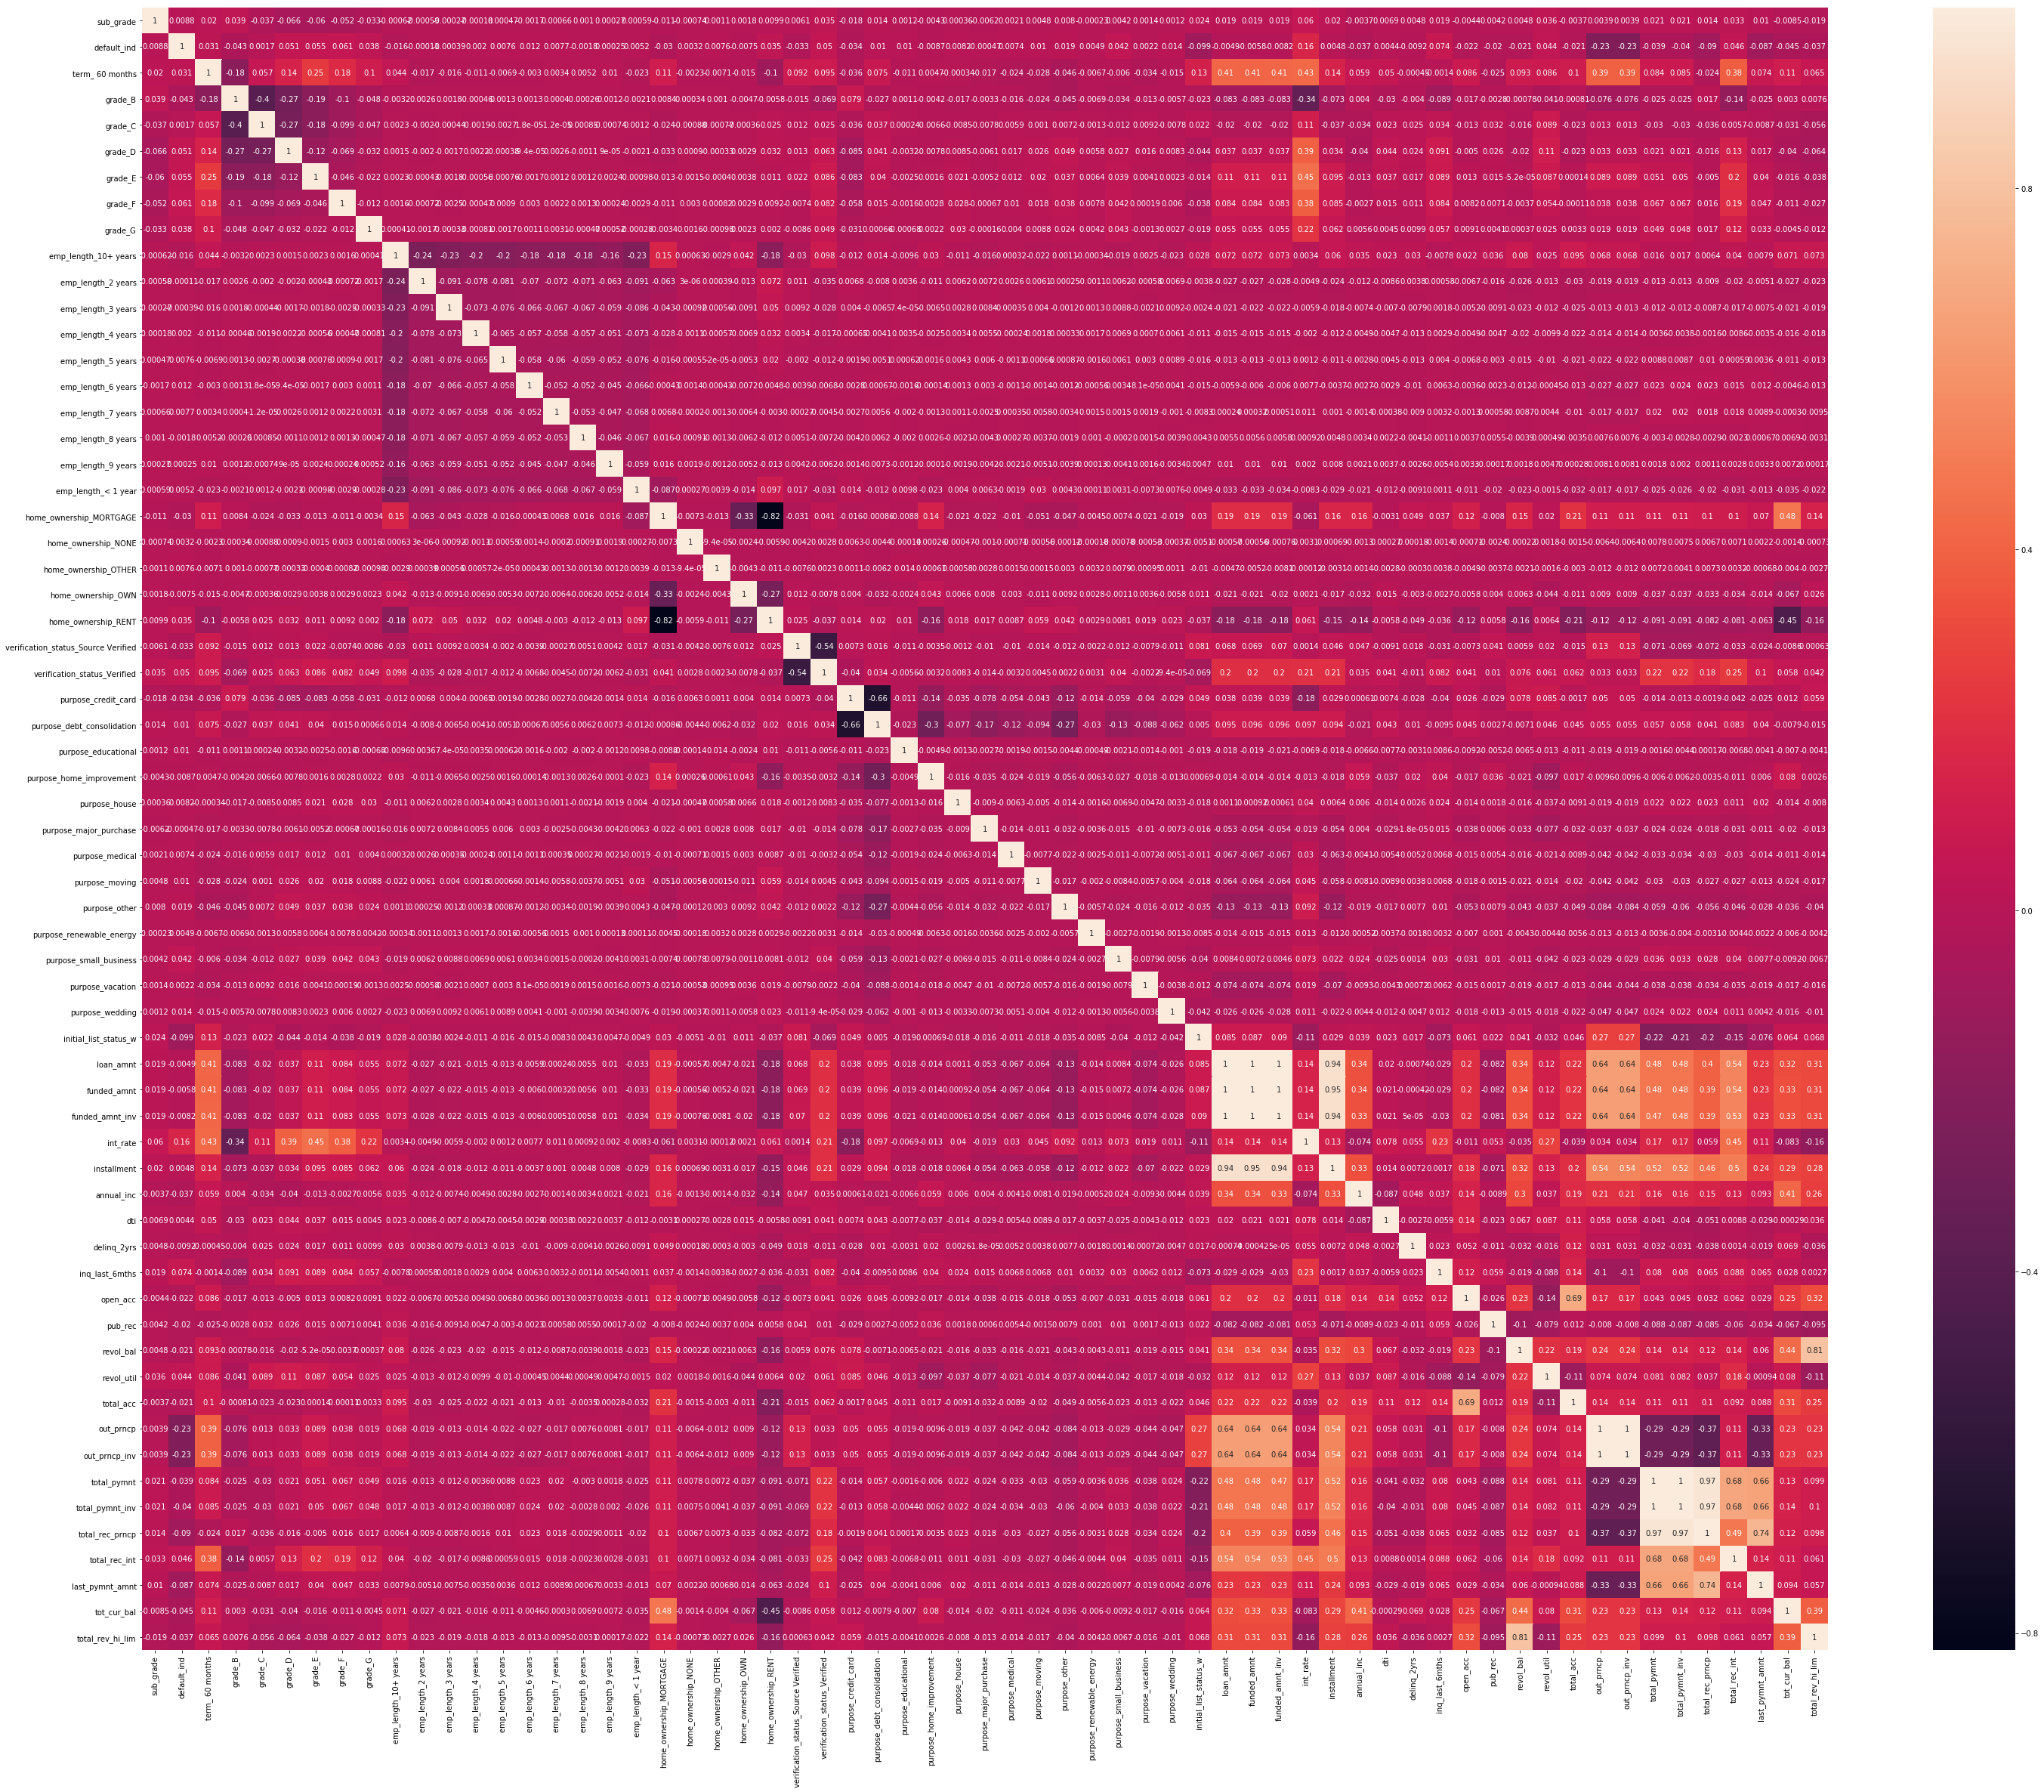

In [154]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,40))        # Size of the figure
sns.heatmap(dataset.corr(),annot = True)

In [155]:
dataset.corr()

,sub_grade,default_ind,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,...,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
sub_grade,1.000000,0.008752,0.020328,0.038790,-0.036780,-0.065586,-0.060062,-0.051770,-0.032839,-0.000616,...,-0.003697,0.003876,0.003913,0.020688,0.020583,0.013909,0.032626,0.009994,-0.008454,-0.018539
default_ind,0.008752,1.000000,0.031378,-0.042575,0.001661,0.051109,0.054951,0.061368,0.037656,-0.016435,...,-0.021087,-0.225960,-0.225959,-0.039220,-0.040232,-0.090336,0.046050,-0.087217,-0.045139,-0.037430
term_ 60 months,0.020328,0.031378,1.000000,-0.182629,0.057486,0.144352,0.251865,0.179967,0.099908,0.043552,...,0.101665,0.391230,0.391187,0.083998,0.085087,-0.023870,0.383918,0.073894,0.110603,0.064664
grade_B,0.038790,-0.042575,-0.182629,1.000000,-0.395038,-0.273694,-0.185286,-0.102096,-0.048327,-0.003175,...,-0.000809,-0.076319,-0.076276,-0.024629,-0.024885,0.017247,-0.142104,-0.025073,0.002962,0.007582
grade_C,-0.036780,0.001661,0.057486,-0.395038,1.000000,-0.265057,-0.179438,-0.098874,-0.046802,0.002333,...,-0.023181,0.012714,0.012768,-0.029780,-0.029710,-0.036491,0.005657,-0.008663,-0.030935,-0.056350
grade_D,-0.065586,0.051109,0.144352,-0.273694,-0.265057,1.000000,-0.124320,-0.068503,-0.032426,0.001499,...,-0.023348,0.033054,0.032943,0.021389,0.021486,-0.015673,0.126485,0.016686,-0.040395,-0.064210
grade_E,-0.060062,0.054951,0.251865,-0.185286,-0.179438,-0.124320,1.000000,-0.046375,-0.021952,0.002311,...,0.000144,0.089373,0.089293,0.050590,0.050360,-0.004972,0.198495,0.040151,-0.016431,-0.038232
grade_F,-0.051770,0.061368,0.179967,-0.102096,-0.098874,-0.068503,-0.046375,1.000000,-0.012096,0.001641,...,-0.000112,0.038356,0.038282,0.067368,0.067180,0.016316,0.191118,0.047047,-0.010795,-0.026654
grade_G,-0.032839,0.037656,0.099908,-0.048327,-0.046802,-0.032426,-0.021952,-0.012096,1.000000,0.000414,...,0.003345,0.019275,0.019270,0.048550,0.048335,0.017211,0.121362,0.032865,-0.004524,-0.012155
emp_length_10+ years,-0.000616,-0.016435,0.043552,-0.003175,0.002333,0.001499,0.002311,0.001641,0.000414,1.000000,...,0.095231,0.068186,0.068190,0.015682,0.016873,0.006376,0.039749,0.007860,0.070687,0.073487


In [156]:
dataset.corr().unstack().sort_values().drop_duplicates()

home_ownership_RENT                  home_ownership_MORTGAGE        -0.818933
purpose_debt_consolidation           purpose_credit_card            -0.663284
verification_status_Source Verified  verification_status_Verified   -0.536370
home_ownership_RENT                  tot_cur_bal                    -0.447597
grade_B                              grade_C                        -0.395038
total_rec_prncp                      out_prncp                      -0.370627
out_prncp_inv                        total_rec_prncp                -0.370620
int_rate                             grade_B                        -0.344814
last_pymnt_amnt                      out_prncp                      -0.333641
out_prncp_inv                        last_pymnt_amnt                -0.333641
home_ownership_MORTGAGE              home_ownership_OWN             -0.331030
purpose_debt_consolidation           purpose_home_improvement       -0.298913
total_pymnt                          out_prncp                  

In [157]:
#dataframe=dataset
#x = dataset.drop(['default_ind'],axis=1)
#y = dataset['default_ind']

In [158]:
x_test = x_test.drop(['home_ownership_RENT','purpose_debt_consolidation','out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','installment','revol_bal','open_acc','total_rec_int'],1)
x_train =x_train.drop(['home_ownership_RENT','purpose_debt_consolidation','out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','installment','revol_bal','open_acc','total_rec_int'],1)

## Checking the Correlation Matrix
After dropping highly correlated variables now let's check the correlation matrix again.

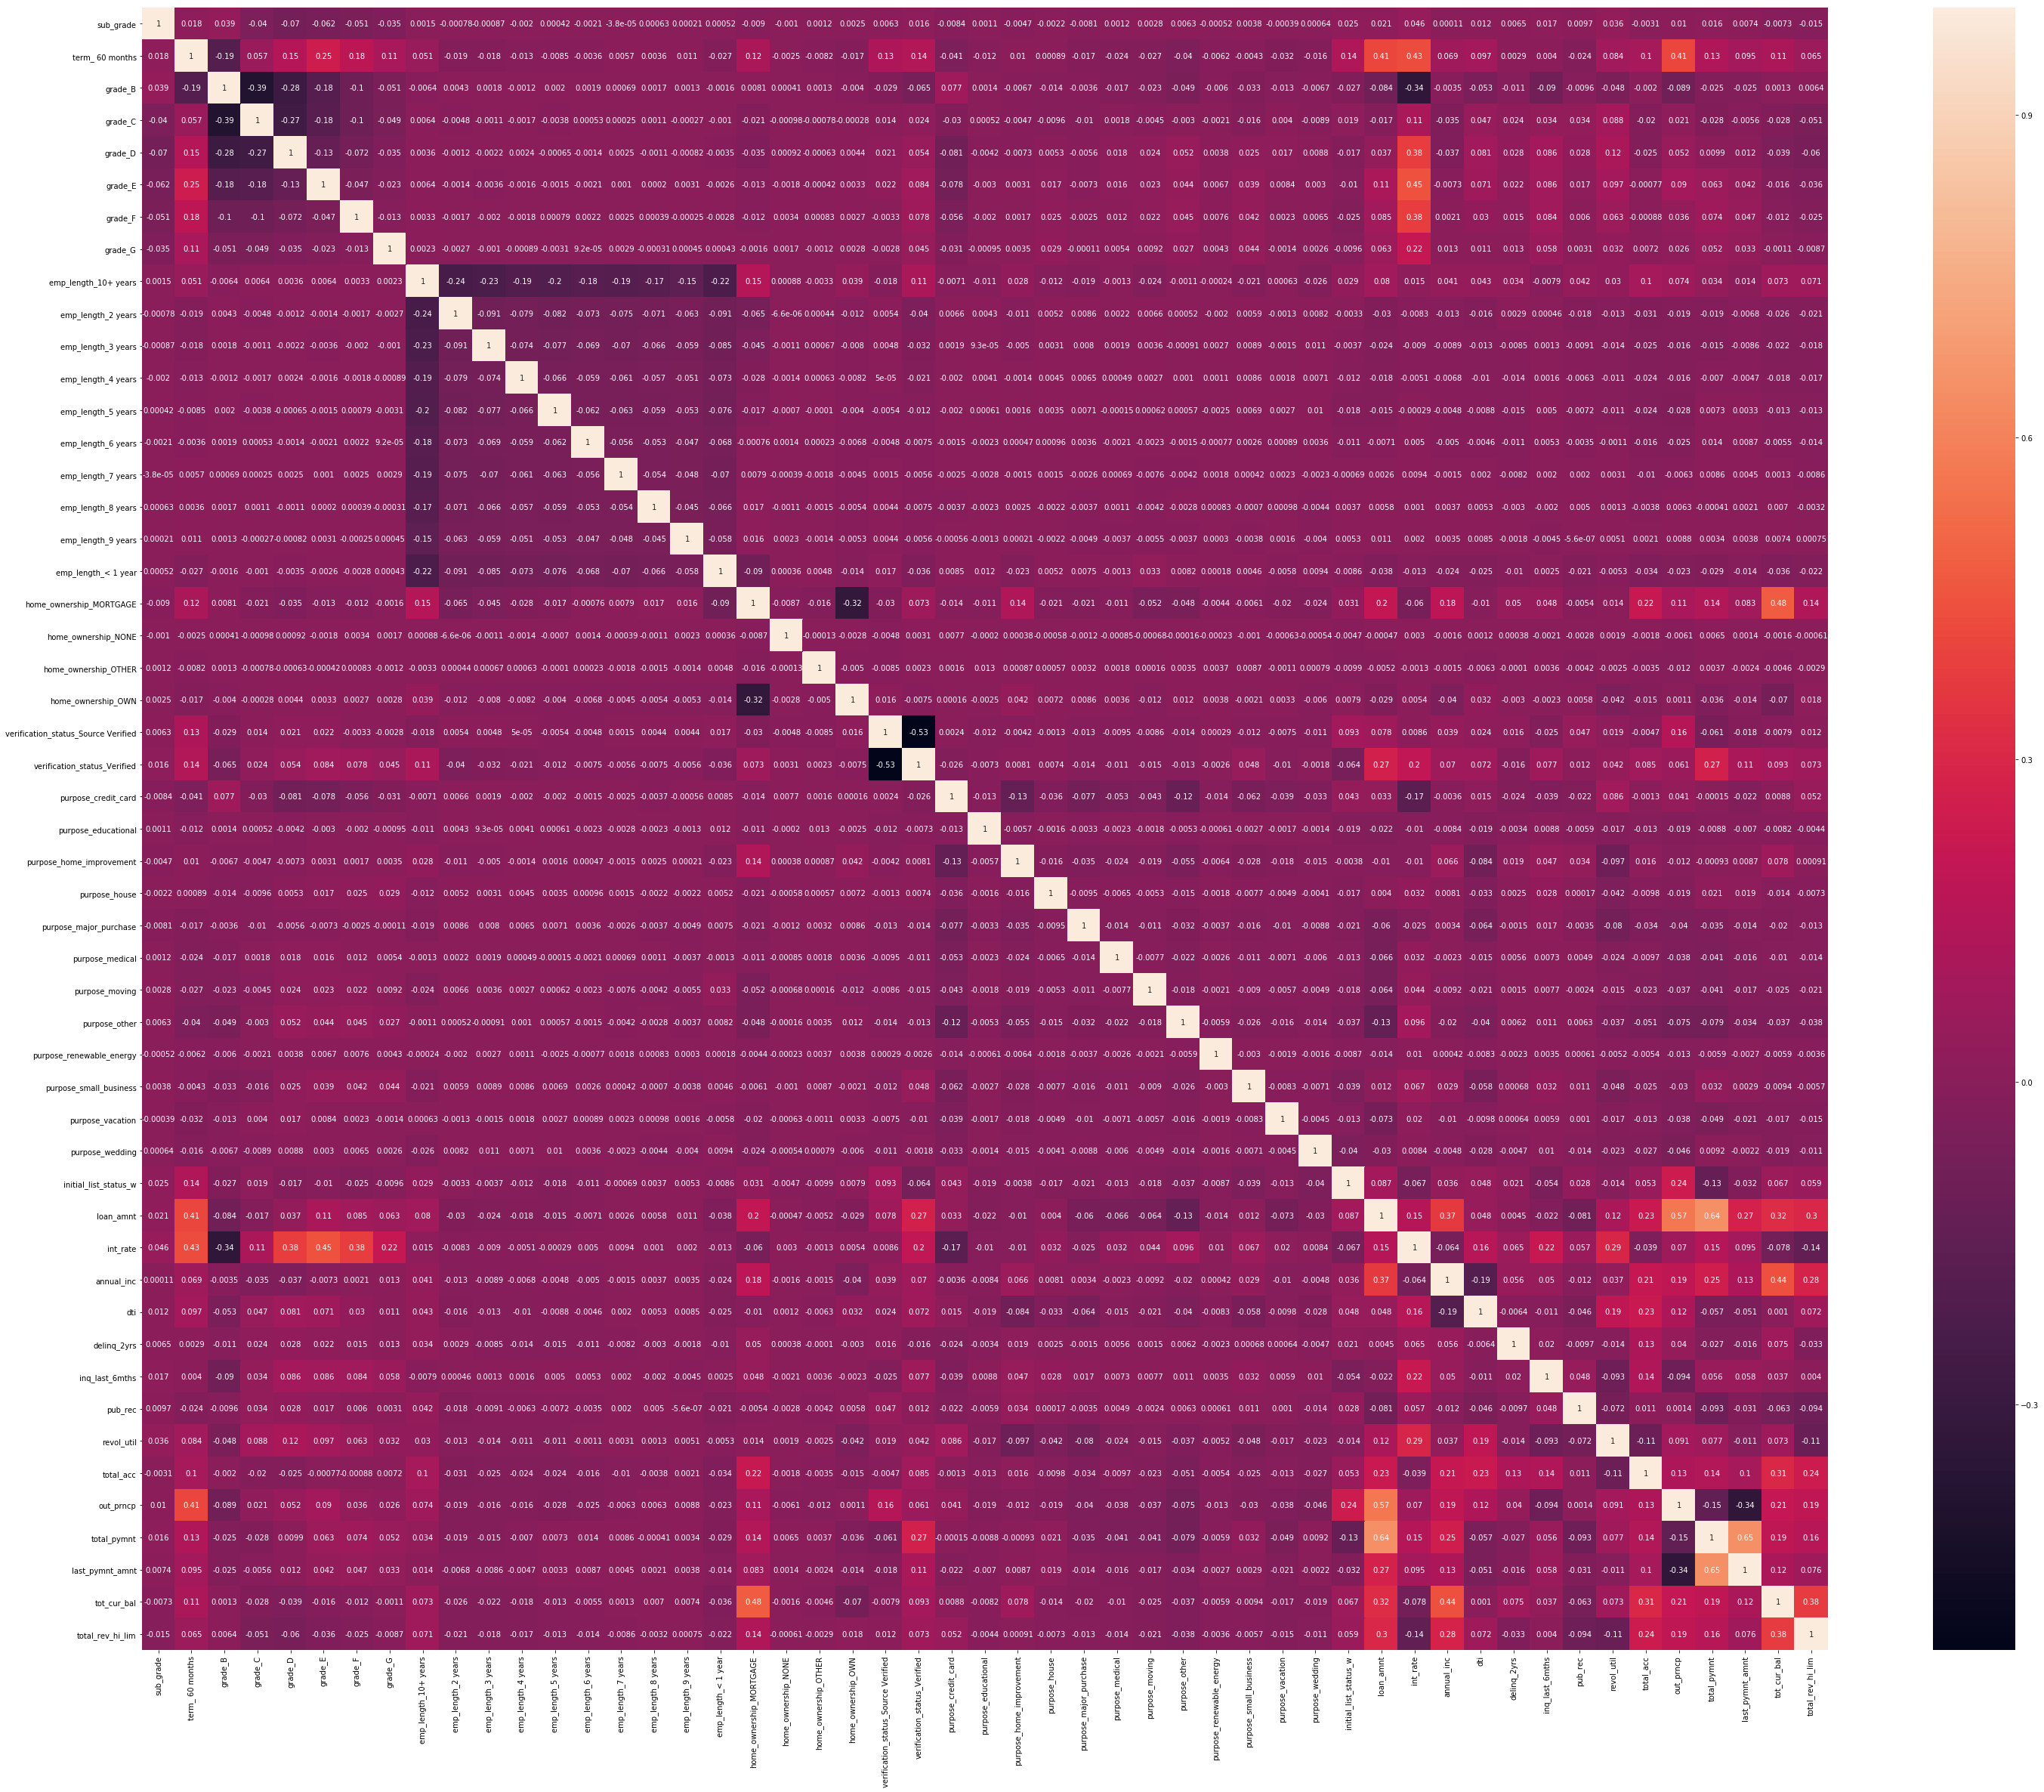

In [159]:
plt.figure(figsize = (50,40))
sns.heatmap(x_train.corr(),annot = True)

In [160]:
x_train.corr().unstack().sort_values().drop_duplicates()

verification_status_Verified  verification_status_Source Verified   -0.528848
grade_B                       grade_C                               -0.390527
                              int_rate                              -0.337738
out_prncp                     last_pymnt_amnt                       -0.336321
home_ownership_MORTGAGE       home_ownership_OWN                    -0.322132
grade_D                       grade_B                               -0.279500
                              grade_C                               -0.267853
emp_length_10+ years          emp_length_2 years                    -0.241316
                              emp_length_3 years                    -0.225473
                              emp_length_< 1 year                   -0.223906
emp_length_5 years            emp_length_10+ years                  -0.202017
emp_length_10+ years          emp_length_4 years                    -0.194506
dti                           annual_inc                        

In [161]:
x_test = x_test.drop(['verification_status_Source Verified','last_pymnt_amnt'],1)
x_train =x_train.drop(['verification_status_Source Verified','last_pymnt_amnt'],1)

In [162]:
x_train.corr().unstack().sort_values().drop_duplicates()

grade_B                       grade_C                        -0.390527
int_rate                      grade_B                        -0.337738
home_ownership_OWN            home_ownership_MORTGAGE        -0.322132
grade_D                       grade_B                        -0.279500
grade_C                       grade_D                        -0.267853
emp_length_10+ years          emp_length_2 years             -0.241316
                              emp_length_3 years             -0.225473
                              emp_length_< 1 year            -0.223906
                              emp_length_5 years             -0.202017
                              emp_length_4 years             -0.194506
annual_inc                    dti                            -0.192813
term_ 60 months               grade_B                        -0.192332
emp_length_7 years            emp_length_10+ years           -0.185334
grade_B                       grade_E                        -0.183904
emp_le

In [163]:
x_test = x_test.drop(['total_pymnt'],1)
x_train =x_train.drop(['total_pymnt'],1)

In [164]:
x_train.corr().unstack().sort_values().drop_duplicates()

grade_B                       grade_C                        -0.390527
int_rate                      grade_B                        -0.337738
home_ownership_MORTGAGE       home_ownership_OWN             -0.322132
grade_D                       grade_B                        -0.279500
                              grade_C                        -0.267853
emp_length_10+ years          emp_length_2 years             -0.241316
emp_length_3 years            emp_length_10+ years           -0.225473
emp_length_10+ years          emp_length_< 1 year            -0.223906
emp_length_5 years            emp_length_10+ years           -0.202017
emp_length_10+ years          emp_length_4 years             -0.194506
dti                           annual_inc                     -0.192813
term_ 60 months               grade_B                        -0.192332
emp_length_10+ years          emp_length_7 years             -0.185334
grade_E                       grade_B                        -0.183904
emp_le

In [165]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256991 entries, 2015-06-01 to 2015-12-01
Data columns (total 48 columns):
sub_grade                       256991 non-null int64
term_ 60 months                 256991 non-null uint8
grade_B                         256991 non-null uint8
grade_C                         256991 non-null uint8
grade_D                         256991 non-null uint8
grade_E                         256991 non-null uint8
grade_F                         256991 non-null uint8
grade_G                         256991 non-null uint8
emp_length_10+ years            256991 non-null uint8
emp_length_2 years              256991 non-null uint8
emp_length_3 years              256991 non-null uint8
emp_length_4 years              256991 non-null uint8
emp_length_5 years              256991 non-null uint8
emp_length_6 years              256991 non-null uint8
emp_length_7 years              256991 non-null uint8
emp_length_8 years              256991 non-null uint8
emp_lengt

In [166]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(x_test,y_test)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False  True False  True  True  True  True  True False  True
 False  True  True False False  True  True False False False  True False
 False False  True  True False  True False  True False  True False False
  True  True False False False False False False False  True False False]
[14 13  3  1 10  1  1  1  1  1  2  1 17  1  1 24  6  1  1 27 28  7  1 15
 29  8  1  1  9  1  4  1 11  1 26 19  1  1 21 23 12 20 22 16 18  1  5 25]


In [167]:
col= ['grade_C','grade_E','grade_F','grade_G','emp_length_10+ years','emp_length_2 years','emp_length_4 years','emp_length_6 years',
      'emp_length_7 years','emp_length_< 1 year','home_ownership_MORTGAGE','verification_status_Verified','purpose_house',
      'purpose_major_purchase','purpose_moving','purpose_renewable_energy','purpose_vacation','loan_amnt','int_rate','out_prncp',
     'tot_cur_bal','purpose_other','grade_B','emp_length_3 years','annual_inc']

I am keeping anual_inc as it seems important

In [168]:
r_col=['sub_grade','term_ 60 months','grade_D','emp_length_3 years','emp_length_5 years','emp_length_8 years','emp_length_9 years',
      'home_ownership_NONE','home_ownership_OTHER','home_ownership_OWN','purpose_credit_card','purpose_educational','purpose_home_improvement',
      'purpose_medical','purpose_other','purpose_small_business','purpose_wedding','initial_list_status_w','dti','delinq_2yrs',
      'inq_last_6mths','pub_rec','revol_util','total_acc','total_rev_hi_lim']

In [169]:
import statsmodels.api as sm

In [170]:
logm2 = sm.GLM(y_train,(sm.add_constant(x_train[col])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            default_ind   No. Observations:               598978
Model:                            GLM   Df Residuals:                   598952
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2277e+05
Date:                Sun, 07 Apr 2019   Deviance:                   2.4553e+05
Time:                        10:57:40   Pearson chi2:                 4.50e+15
No. Iterations:                    10   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -5.9698      0.040   -149.461      0.000      -6.048      -5.892
grade_C                          0.0888      0.014      6.457      0.000       0.062       0.116
grade_E                         -0.0469      0.021     -2.250      0.024      -0.088      -0.006
grade_F                         -0.2470      0.030     -8.221      0.000      -0.306      -0.188
grade_G                         -0.2914      0.052     -5.634      0.000      -0.393      -0.190
emp_length_10+ years            -0.0132      0.014     -0.922      0.357      -0.041       0.015
emp_length_2 years              -0.0469      0.021     -2.264      0.024      -0.087      -0.006
emp_length_4 years              -0.0267      0.024     -1.120      0.263      -0.073       0.020
emp_length_6 years               0.0165      0.024      0.683      0.495      -0.031       0.064
emp_length_7 years              -0.0015      0.025     -0.061      0.952      -0.050       0.047
emp_length_< 1 year              0.0494      0.021      2.332      0.020       0.008       0.091
home_ownership_MORTGAGE         -0.1047      0.012     -8.470      0.000      -0.129      -0.080
verification_status_Verified     0.0006      0.011      0.057      0.955      -0.022       0.023
purpose_house                   -0.1330      0.067     -1.982      0.047      -0.264      -0.001
purpose_major_purchase          -0.0768      0.038     -2.040      0.041      -0.151      -0.003
purpose_moving                   0.0098      0.055      0.178      0.859      -0.098       0.117
purpose_renewable_energy         0.1273      0.155      0.820      0.412      -0.177       0.432
purpose_vacation                -0.1305      0.066     -1.975      0.048      -0.260      -0.001
loan_amnt                        0.3111      0.007     46.412      0.000       0.298       0.324
int_rate                         0.6140      0.009     71.712      0.000       0.597       0.631
out_prncp                       -4.2575      0.039   -109.680      0.000      -4.334      -4.181
tot_cur_bal                     -0.0543      0.009     -6.341      0.000      -0.071      -0.038
purpose_other                   -0.0110      0.022     -0.502      0.616      -0.054       0.032
grade_B                          0.0253      0.016      1.579      0.114      -0.006       0.057
emp_length_3 years              -0.0207      0.022     -0.953      0.340      -0.063       0.022
annual_inc                      -0.4419      0.012    -35.892      0.000      -0.466      -0.418
================================================================================================
"""

In [173]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [172]:
# Calculating Vif value
vif_cal(input_data=dataset.drop(['sub_grade','term_ 60 months','grade_D','emp_length_3 years','emp_length_5 years','emp_length_8 years','emp_length_9 years',
      'home_ownership_NONE','home_ownership_OTHER','home_ownership_OWN','purpose_credit_card','purpose_educational','purpose_home_improvement',
      'purpose_medical','purpose_other','purpose_small_business','purpose_wedding','initial_list_status_w','dti','delinq_2yrs',
      'inq_last_6mths','pub_rec','revol_util','total_acc','total_rev_hi_lim','home_ownership_RENT','purpose_debt_consolidation','out_prncp_inv',
      'funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','installment','revol_bal','open_acc',
      'total_rec_int','verification_status_Source Verified','last_pymnt_amnt','total_pymnt','issue_d',], axis=1), dependent_col='default_ind')

,Var,Vif
18,loan_amnt,2.05
19,int_rate,2.03
21,out_prncp,1.75
22,tot_cur_bal,1.53
20,annual_inc,1.29
16,purpose_renewable_energy,0.07
13,purpose_house,0.05
17,purpose_vacation,0.04
3,grade_F,0.01
8,emp_length_6 years,0.01


In [174]:
logm3 = sm.GLM(y_train,(sm.add_constant(x_train[r_col])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            default_ind   No. Observations:               598978
Model:                            GLM   Df Residuals:                   598952
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5607e+05
Date:                Sun, 07 Apr 2019   Deviance:                   3.1214e+05
Time:                        11:10:33   Pearson chi2:                 9.95e+06
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.5960      0.014   -188.290      0.000      -2.623      -2.569
sub_grade                    0.0175      0.004      4.999      0.000       0.011       0.024
term_ 60 months              0.4198      0.011     39.360      0.000       0.399       0.441
grade_D                      0.2585      0.012     21.342      0.000       0.235       0.282
emp_length_3 years          -0.0127      0.018     -0.687      0.492      -0.049       0.023
emp_length_5 years           0.0755      0.019      3.891      0.000       0.037       0.114
emp_length_8 years          -0.0150      0.023     -0.650      0.516      -0.060       0.030
emp_length_9 years           0.0228      0.025      0.896      0.370      -0.027       0.073
home_ownership_NONE          0.8257      0.416      1.986      0.047       0.011       1.641
home_ownership_OTHER         0.8621      0.217      3.970      0.000       0.437       1.288
home_ownership_OWN          -0.0303      0.017     -1.750      0.080      -0.064       0.004
purpose_credit_card         -0.2425      0.013    -18.385      0.000      -0.268      -0.217
purpose_educational          0.8153      0.149      5.473      0.000       0.523       1.107
purpose_home_improvement    -0.1127      0.023     -4.934      0.000      -0.158      -0.068
purpose_medical              0.3000      0.045      6.684      0.000       0.212       0.388
purpose_other                0.2499      0.021     12.123      0.000       0.210       0.290
purpose_small_business       0.8765      0.031     28.248      0.000       0.816       0.937
purpose_wedding              0.2951      0.066      4.443      0.000       0.165       0.425
initial_list_status_w       -0.5675      0.011    -51.363      0.000      -0.589      -0.546
dti                          0.2651      0.011     23.721      0.000       0.243       0.287
delinq_2yrs                 -0.0265      0.005     -4.852      0.000      -0.037      -0.016
inq_last_6mths               0.2289      0.004     54.154      0.000       0.221       0.237
pub_rec                     -0.0984      0.007    -15.030      0.000      -0.111      -0.086
revol_util                   0.1238      0.005     23.386      0.000       0.113       0.134
total_acc                   -0.0932      0.006    -16.392      0.000      -0.104      -0.082
total_rev_hi_lim            -0.2621      0.010    -26.879      0.000      -0.281      -0.243
============================================================================================
"""

In [175]:
vif_cal(input_data=dataset.drop(['grade_C','grade_E','grade_F','grade_G','emp_length_10+ years','emp_length_2 years','emp_length_4 years','emp_length_6 years',
      'emp_length_7 years','emp_length_< 1 year','home_ownership_MORTGAGE','verification_status_Verified','purpose_house',
      'purpose_major_purchase','purpose_moving','purpose_renewable_energy','purpose_vacation','loan_amnt','int_rate','out_prncp',
     'tot_cur_bal','purpose_other','grade_B','emp_length_3 years','annual_inc','home_ownership_RENT','purpose_debt_consolidation','out_prncp_inv',
      'funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','installment','revol_bal','open_acc',
      'total_rec_int','verification_status_Source Verified','last_pymnt_amnt','total_pymnt','issue_d',], axis=1), dependent_col='default_ind')

,Var,Vif
0,sub_grade,2.26
21,total_acc,1.14
22,total_rev_hi_lim,1.11
20,revol_util,1.08
18,inq_last_6mths,1.05
16,dti,1.03
19,pub_rec,1.02
17,delinq_2yrs,1.02
6,home_ownership_NONE,1.00
7,home_ownership_OTHER,1.00


In [176]:
f_col=['grade_C','grade_E','grade_F','grade_G','emp_length_2 years','emp_length_< 1 year','home_ownership_MORTGAGE','purpose_house',
      'purpose_major_purchase','purpose_vacation','loan_amnt','int_rate','out_prncp',
     'tot_cur_bal','annual_inc','sub_grade','term_ 60 months','grade_D','emp_length_5 years',
      'home_ownership_NONE','home_ownership_OTHER','purpose_credit_card','purpose_educational','purpose_home_improvement',
      'purpose_medical','purpose_other','purpose_small_business','purpose_wedding','initial_list_status_w','dti','delinq_2yrs',
      'inq_last_6mths','pub_rec','revol_util','total_acc','total_rev_hi_lim']

In [177]:
logm4 = sm.GLM(y_train,(sm.add_constant(x_train[f_col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            default_ind   No. Observations:               598978
Model:                            GLM   Df Residuals:                   598941
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2138e+05
Date:                Sun, 07 Apr 2019   Deviance:                   2.4277e+05
Time:                        11:14:45   Pearson chi2:                 4.50e+15
No. Iterations:                    10   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.0088      0.044   -135.862      0.000      -6.096      -5.922
grade_C                      0.0437      0.021      2.073      0.038       0.002       0.085
grade_E                     -0.1456      0.042     -3.432      0.001      -0.229      -0.062
grade_F                     -0.3576      0.056     -6.354      0.000      -0.468      -0.247
grade_G                     -0.4446      0.074     -5.975      0.000      -0.591      -0.299
emp_length_2 years          -0.0364      0.019     -1.948      0.051      -0.073       0.000
emp_length_< 1 year          0.0636      0.019      3.299      0.001       0.026       0.101
home_ownership_MORTGAGE     -0.1303      0.013    -10.364      0.000      -0.155      -0.106
purpose_house               -0.0222      0.067     -0.329      0.742      -0.154       0.110
purpose_major_purchase      -0.0431      0.038     -1.131      0.258      -0.118       0.032
purpose_vacation            -0.0507      0.066     -0.766      0.444      -0.180       0.079
loan_amnt                    0.2322      0.007     32.042      0.000       0.218       0.246
int_rate                     0.4739      0.016     28.749      0.000       0.442       0.506
out_prncp                   -4.2552      0.038   -111.121      0.000      -4.330      -4.180
tot_cur_bal                 -0.0994      0.009    -10.859      0.000      -0.117      -0.081
annual_inc                  -0.3280      0.013    -25.003      0.000      -0.354      -0.302
sub_grade                   -0.0049      0.004     -1.097      0.273      -0.014       0.004
term_ 60 months              0.5276      0.014     36.406      0.000       0.499       0.556
grade_D                     -0.0196      0.031     -0.630      0.529      -0.080       0.041
emp_length_5 years          -0.0106      0.021     -0.512      0.609      -0.051       0.030
home_ownership_NONE         -0.1732      0.428     -0.404      0.686      -1.012       0.666
home_ownership_OTHER         0.3479      0.220      1.580      0.114      -0.084       0.780
purpose_credit_card         -0.0822      0.014     -5.760      0.000      -0.110      -0.054
purpose_educational          0.5688      0.150      3.796      0.000       0.275       0.862
purpose_home_improvement     0.0301      0.025      1.216      0.224      -0.018       0.079
purpose_medical              0.1337      0.047      2.817      0.005       0.041       0.227
purpose_other                0.0673      0.022      3.011      0.003       0.024       0.111
purpose_small_business       0.6340      0.034     18.616      0.000       0.567       0.701
purpose_wedding             -0.1892      0.068     -2.789      0.005      -0.322      -0.056
initial_list_status_w       -0.0622      0.012     -5.207      0.000      -0.086      -0.039
dti                          0.3850      0.013     28.967      0.000       0.359       0.411


In [178]:
f_col2=['grade_C','grade_E','grade_F','grade_G','emp_length_< 1 year','home_ownership_MORTGAGE','loan_amnt','int_rate','out_prncp',
        'tot_cur_bal','annual_inc','term_ 60 months','purpose_credit_card','purpose_educational','purpose_medical',
        'purpose_other','purpose_small_business','purpose_wedding','initial_list_status_w','dti','delinq_2yrs','inq_last_6mths',
        'pub_rec','revol_util','total_acc',]

In [179]:
logm5 = sm.GLM(y_train,(sm.add_constant(x_train[f_col2])), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            default_ind   No. Observations:               598978
Model:                            GLM   Df Residuals:                   598952
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2139e+05
Date:                Sun, 07 Apr 2019   Deviance:                   2.4278e+05
Time:                        11:15:36   Pearson chi2:                 4.50e+15
No. Iterations:                    10   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.0359      0.038   -159.469      0.000      -6.110      -5.962
grade_C                     0.0557      0.012      4.515      0.000       0.032       0.080
grade_E                    -0.1197      0.021     -5.676      0.000      -0.161      -0.078
grade_F                    -0.3237      0.030    -10.614      0.000      -0.383      -0.264
grade_G                    -0.4058      0.052     -7.783      0.000      -0.508      -0.304
emp_length_< 1 year         0.0679      0.019      3.565      0.000       0.031       0.105
home_ownership_MORTGAGE    -0.1261      0.012    -10.141      0.000      -0.150      -0.102
loan_amnt                   0.2318      0.007     32.894      0.000       0.218       0.246
int_rate                    0.4646      0.009     53.947      0.000       0.448       0.481
out_prncp                  -4.2552      0.038   -111.256      0.000      -4.330      -4.180
tot_cur_bal                -0.1012      0.009    -11.342      0.000      -0.119      -0.084
annual_inc                 -0.3295      0.013    -25.329      0.000      -0.355      -0.304
term_ 60 months             0.5255      0.014     36.716      0.000       0.497       0.554
purpose_credit_card        -0.0826      0.014     -5.863      0.000      -0.110      -0.055
purpose_educational         0.5667      0.150      3.783      0.000       0.273       0.860
purpose_medical             0.1327      0.047      2.804      0.005       0.040       0.225
purpose_other               0.0668      0.022      3.019      0.003       0.023       0.110
purpose_small_business      0.6323      0.034     18.675      0.000       0.566       0.699
purpose_wedding            -0.1912      0.068     -2.822      0.005      -0.324      -0.058
initial_list_status_w      -0.0626      0.012     -5.244      0.000      -0.086      -0.039
dti                         0.3836      0.013     29.169      0.000       0.358       0.409
delinq_2yrs                 0.0387      0.006      6.692      0.000       0.027       0.050
inq_last_6mths              0.0890      0.005     18.302      0.000       0.079       0.098
pub_rec                    -0.0140      0.007     -2.032      0.042      -0.028      -0.000
revol_util                  0.0747      0.006     12.501      0.000       0.063       0.086
total_acc                  -0.0739      0.006    -11.570      0.000      -0.086      -0.061
===========================================================================================
"""

In [180]:
vif_cal(input_data=dataset.drop(['emp_length_10+ years','emp_length_2 years','emp_length_4 years','emp_length_6 years','home_ownership_OTHER',
      'emp_length_7 years','verification_status_Verified','purpose_house','grade_D','sub_grade','total_rev_hi_lim','emp_length_5 years',
      'purpose_major_purchase','purpose_moving','purpose_renewable_energy','purpose_vacation','grade_B','emp_length_3 years','emp_length_8 years',
       'home_ownership_NONE','home_ownership_RENT','purpose_debt_consolidation','out_prncp_inv','inq_last_6mths','home_ownership_OWN',
      'funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','installment','revol_bal','open_acc','purpose_home_improvement',
      'total_rec_int','verification_status_Source Verified','last_pymnt_amnt','total_pymnt','issue_d',], axis=1), dependent_col='default_ind')

,Var,Vif
16,int_rate,2.41
15,loan_amnt,2.14
23,out_prncp,1.90
24,tot_cur_bal,1.57
17,annual_inc,1.31
22,total_acc,1.20
21,revol_util,1.19
18,dti,1.05
20,pub_rec,1.04
19,delinq_2yrs,1.03


In [181]:
x_train[f_col2]

,grade_C,grade_E,grade_F,grade_G,emp_length_< 1 year,home_ownership_MORTGAGE,loan_amnt,int_rate,out_prncp,tot_cur_bal,...,purpose_other,purpose_small_business,purpose_wedding,initial_list_status_w,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,total_acc
issue_d,,,,,,,,,,,,,,,,,,,,,
2007-06-01,0,1,0,0,1,0,-0.859974,0.127663,-0.979069,-0.364300,...,0,0,0,0,-0.219941,0.803065,-0.706319,-0.334495,-0.147860,-1.461164
2007-07-01,0,0,0,0,0,1,-1.156698,-1.319102,-0.979069,-0.364300,...,0,0,0,0,-1.040091,-0.363538,-0.706319,-0.334495,-1.492093,-0.530447
2007-07-01,0,0,0,0,0,1,-1.067681,-1.319102,-0.979069,-0.364300,...,0,0,0,0,-1.024595,-0.363538,-0.706319,-0.334495,-1.882761,-0.784279
2007-07-01,0,0,0,0,0,0,-1.156698,-1.319102,-0.979069,-0.364300,...,0,0,0,0,-0.893738,-0.363538,1.368299,-0.334495,-1.723133,-1.545775
2007-07-01,1,0,0,0,1,0,-1.607718,-0.378247,-0.979069,-0.364300,...,0,0,0,0,-0.923009,-0.363538,1.368299,-0.334495,0.872917,-1.799607
2007-07-01,1,0,0,0,0,0,-0.296198,-0.595719,-0.979069,-0.364300,...,0,1,0,0,-0.057518,0.803065,1.368299,-0.334495,-1.970977,-0.107394
2007-07-01,0,0,1,0,0,0,-1.429684,0.633573,-0.979069,-0.364300,...,0,0,0,0,-0.318657,-0.363538,0.330990,-0.334495,1.566038,-1.038111
2007-07-01,0,0,0,0,0,1,-1.156698,-0.957411,-0.979069,-0.364300,...,1,0,0,0,-0.466158,1.969668,-0.706319,-0.334495,-0.773769,-1.545775
2007-07-01,0,0,0,0,1,0,-1.334732,-0.739938,-0.979069,-0.364300,...,0,0,0,0,-0.096545,-0.363538,0.330990,-0.334495,-0.584736,-0.784279


# LOGISTIC REGRESSION IMPLEMENTATION

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
classifier=LogisticRegression(random_state=0)

In [184]:
classifier.fit(x_train[f_col2],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
# Predicted probabilities
y_pred = classifier.predict_proba(x_test[f_col2])

In [186]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [187]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [188]:
# Let's see the head
y_pred_1.head()

,1
0,5.366459e-08
1,9.045400e-04
2,1.929788e-03
3,8.107184e-08
4,5.928157e-07


In [189]:
y_pred_1

,1
0,5.366459e-08
1,9.045400e-04
2,1.929788e-03
3,8.107184e-08
4,5.928157e-07
5,1.810023e-02
6,2.795559e-05
7,2.169859e-03
8,4.958419e-04
9,4.243849e-05


In [190]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [191]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [192]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [193]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'default_Prob'})

In [194]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['default_ind','default_Prob'], axis=1)

In [195]:
# Let's see the head of y_pred_final
y_pred_final.head()

,default_ind,default_Prob
0,0,5.366459e-08
1,0,9.045400e-04
2,0,1.929788e-03
3,0,8.107184e-08
4,0,5.928157e-07


In [196]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.default_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [197]:
# Let's see the head
y_pred_final.head()

,default_ind,default_Prob,predicted
0,0,5.366459e-08,0
1,0,9.045400e-04,0
2,0,1.929788e-03,0
3,0,8.107184e-08,0
4,0,5.928157e-07,0


# PERFORMANCE METRICS CALCULATION

In [199]:
from sklearn import metrics

In [200]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.default_ind, y_pred_final.predicted )

In [201]:
confusion

array([[256603,     77],
       [   300,     11]], dtype=int64)

In [202]:
# Predicted     not_default  default
# Actual
# not_default      256603      77
# default          300         11

In [203]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.default_ind, y_pred_final.predicted)

0.9985330225572102

In [204]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [205]:
# Let's see the precision of our logistic regression model
TP / float(TP+FN)

0.9988322440765581

In [206]:
# Let us calculate recall
TN / float(TN+FP)

0.125

In [207]:
# Calculate false postive rate - predicting default when customer does not have defaulted
print(FP/ float(TN+FP))

0.875


In [208]:
# positive predictive value 
print (TP / float(TP+FP))

0.999700015583606


In [209]:
# Negative predictive value
print (TN / float(TN+ FN))

0.03536977491961415


# MODEL VALIDATION 

## AUC Curve 

In [210]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='AUC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Model Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

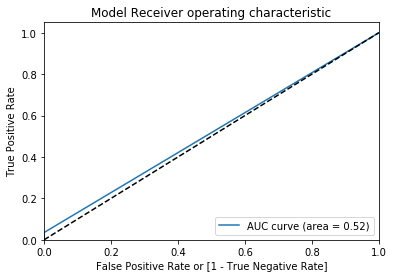

(array([0.00000000e+00, 2.99984416e-04, 1.00000000e+00]),
 array([0.        , 0.03536977, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [211]:
draw_roc(y_pred_final.default_ind, y_pred_final.predicted)

In [212]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.default_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,default_ind,default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,5.366459e-08,0,1,0,0,0,0,0,0,0,0,0
1,0,9.045400e-04,0,1,0,0,0,0,0,0,0,0,0
2,0,1.929788e-03,0,1,0,0,0,0,0,0,0,0,0
3,0,8.107184e-08,0,1,0,0,0,0,0,0,0,0,0
4,0,5.928157e-07,0,1,0,0,0,0,0,0,0,0,0


In [213]:
# Now let's calculate accuracy precision and recall for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.default_ind, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  precision    recall
0.0   0.0  0.001210   0.000000  1.000000
0.1   0.1  0.976338   0.976687  0.688103
0.2   0.2  0.990116   0.990856  0.379421
0.3   0.3  0.994891   0.995847  0.205788
0.4   0.4  0.997475   0.998570  0.093248
0.5   0.5  0.998533   0.999700  0.035370
0.6   0.6  0.998751   0.999957  0.003215
0.7   0.7  0.998774   0.999984  0.000000
0.8   0.8  0.998774   0.999984  0.000000
0.9   0.9  0.998774   0.999984  0.000000


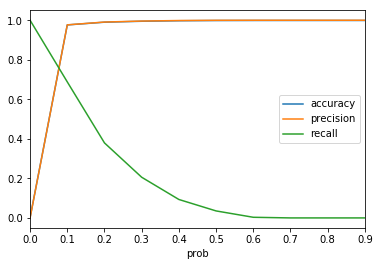

In [214]:
# Let's plot accuracy precision and recall for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','precision','recall'])

In [215]:
y_pred_final['final_predicted'] = y_pred_final.default_Prob.map( lambda x: 1 if x > 0.1 else 0)

In [216]:
y_pred_final.head()

,default_ind,default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,5.366459e-08,0,1,0,0,0,0,0,0,0,0,0,0
1,0,9.045400e-04,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1.929788e-03,0,1,0,0,0,0,0,0,0,0,0,0
3,0,8.107184e-08,0,1,0,0,0,0,0,0,0,0,0,0
4,0,5.928157e-07,0,1,0,0,0,0,0,0,0,0,0,0


In [218]:
y_pred_final

,default_ind,default_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,5.366459e-08,0,1,0,0,0,0,0,0,0,0,0,0
1,0,9.045400e-04,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1.929788e-03,0,1,0,0,0,0,0,0,0,0,0,0
3,0,8.107184e-08,0,1,0,0,0,0,0,0,0,0,0,0
4,0,5.928157e-07,0,1,0,0,0,0,0,0,0,0,0,0
5,0,1.810023e-02,0,1,0,0,0,0,0,0,0,0,0,0
6,0,2.795559e-05,0,1,0,0,0,0,0,0,0,0,0,0
7,0,2.169859e-03,0,1,0,0,0,0,0,0,0,0,0,0
8,0,4.958419e-04,0,1,0,0,0,0,0,0,0,0,0,0
9,0,4.243849e-05,0,1,0,0,0,0,0,0,0,0,0,0


In [219]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.default_ind, y_pred_final.final_predicted)

0.9763376927596686

In [220]:
metrics.confusion_matrix( y_pred_final.default_ind, y_pred_final.final_predicted )

array([[250696,   5984],
       [    97,    214]], dtype=int64)

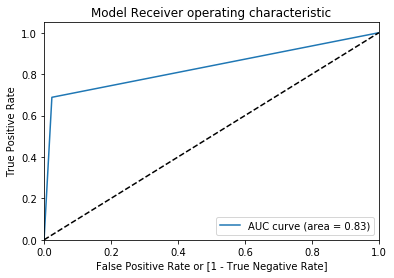

(array([0.        , 0.02331307, 1.        ]),
 array([0.        , 0.68810289, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [221]:
draw_roc(y_pred_final.default_ind, y_pred_final.final_predicted)

In [222]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(x_test[f_col2],y_test)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True  True False  True False  True  True False  True
  True]
[1 1 1 1 1 1 1 1 1 1 2 1 1 6 1 1 1 5 1 3 1 1 4 1 1]


In [223]:
x_test[f_col2].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256991 entries, 2015-06-01 to 2015-12-01
Data columns (total 25 columns):
grade_C                    256991 non-null uint8
grade_E                    256991 non-null uint8
grade_F                    256991 non-null uint8
grade_G                    256991 non-null uint8
emp_length_< 1 year        256991 non-null uint8
home_ownership_MORTGAGE    256991 non-null uint8
loan_amnt                  256991 non-null float64
int_rate                   256991 non-null float64
out_prncp                  256991 non-null float64
tot_cur_bal                256991 non-null float64
annual_inc                 256991 non-null float64
term_ 60 months            256991 non-null uint8
purpose_credit_card        256991 non-null uint8
purpose_educational        256991 non-null uint8
purpose_medical            256991 non-null uint8
purpose_other              256991 non-null uint8
purpose_small_business     256991 non-null uint8
purpose_wedding            256

Final features which is giving best result in our analysis are:-['grade_C','grade_E','grade_F','grade_G','home_ownership_MORTGAGE','loan_amnt','int_rate','out_prncp',
        'tot_cur_bal',
        'purpose_other']

RFE is used for feature selection and we have seen the p-value and VIF value of variables, removed the variables with
p-value more than 0.05 and VIF value more than 10.

Finally left with 10 variables with 0.84 as AUC which is a good prediction.

# Project Done and Explained by Ryan Cliff Wandera
Thank you!